 ## **EURISKO PRO DEV (FOOD NUTRITION & DIETETICS MODEL FOR DIEBETICS)**

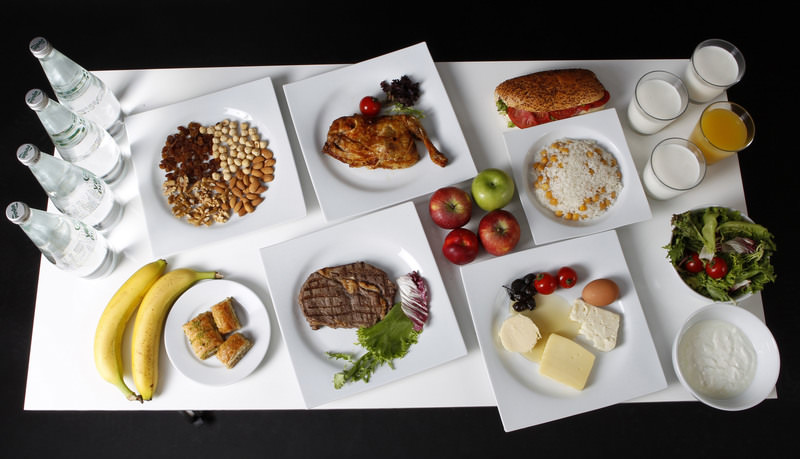

**MEMBERS:**

1.	Eltonjohn Oketch
2.	Anne Nyambura
3.	Mary Njuguna
4.	Geoffrey Chege
5.	Ruth Mwaura
6.	Peter Maina
7.	Hellen Cheptoo
8.	Joseph Njuguna
9.	Damaris Muli


# **1. Defining the Question** 

### a) Specifying the Question

- Build a machine learning model that will help classify individuals to whether they have diebetes or not,then further recommend foods to both classes independently.

### b) Defining the Metric for Success

- To Build a model that will make predictions with an accuracy of not less than 65% and deploy that model on streamlit.

### c) Understanding the context

- According to the National Institute of Diabetes and Kidney Diseases,diabetes is a disease that occurs when your blood glucose (blood sugar) is too high. Blood glucose is your main source of energy and comes from the food we eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes the body does not make enough-or-any insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.
- In this regard, food nutrition recommendation systems would be helpful. Food nutrition and recommendation system is a model which suggests the best diets according to a patient's health situation and preferences. 

### d) Recording the Experimental Design

- Hypothesis: Classify individuals into two classes.Those with diabetes and those without

- X-Variable: The feature variables used to predict the outcome.

- y-Variable: The diabetes class labels (0, 1) (without,with respectively)

- Experimental setup: Classify the individuals to those with diabetes (1) and those without(0) based on the individuals prompted inputs of their medical details.

- Design of the Experiment: Analyze 768 individuals over 9 metrics use to predict their outcome class then recommend food for each individual class independently.

- Sample size: 768 individuals.

### e) Data Relevance

- The data we used for this analysis was from the PIMA people of indian heritage. Their information were taken as part of a clinical trial therefore its accuracy is of the highest percentile, thorough and verifiably relevant in every accord.


# **2. Importing Libraries.**

In [1]:
#First, we shall import the different python libraries that we are going to use
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload
from IPython.display import Image
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz,plot_tree
import graphviz
from graphviz import Digraph
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import matplotlib.pyplot as mp

# **3. Reading the Data**

In [2]:
#We can now read our dataset
Dataset = ("https://raw.githubusercontent.com/boosuro/diabetes_prediction_with_knn/master/diabetes.csv")

def read (data):
  return pd.read_csv(data)

diab = read(Dataset)

In [3]:
#We can now read our dataset
Dataset = ("https://raw.githubusercontent.com/Omashelley/food-recommendation/main/nutrition.csv")

def read (data):
  return pd.read_csv(data)

nutrio = read(Dataset)

# **4. Data Understanding**

## **Data Exploration**

### Nutrio dataframe

In [4]:
# preview of top 5 rows in our nutrio dataset
nutrio.head(5)

Unnamed: 0             name serving_size  calories total_fat saturated_fat  \
0           0       Cornstarch        100 g       381      0.1g           NaN   
1           1     Nuts, pecans        100 g       691       72g          6.2g   
2           2    Eggplant, raw        100 g        25      0.2g           NaN   
3           3   Teff, uncooked        100 g       367      2.4g          0.4g   
4           4  Sherbet, orange        100 g       144        2g          1.2g   

  cholesterol    sodium  choline     folate  ...      fat  \
0           0   9.00 mg   0.4 mg   0.00 mcg  ...   0.05 g   
1           0   0.00 mg  40.5 mg  22.00 mcg  ...  71.97 g   
2           0   2.00 mg   6.9 mg  22.00 mcg  ...   0.18 g   
3           0  12.00 mg  13.1 mg          0  ...   2.38 g   
4         1mg  46.00 mg   7.7 mg   4.00 mcg  ...   2.00 g   

  saturated_fatty_acids monounsaturated_fatty_acids  \
0               0.009 g                     0.016 g   
1               6.180 g                    40.801 g   
2               0.034 g                     0.016 g   
3               0.449 g                     0.589 g   
4               1.160 g                     0.530 g   

  polyunsaturated_fatty_acids fatty_acids_total_trans alcohol     ash  \
0                     0.025 g                 0.00 mg   0.0 g  0.09 g   
1                    21.614 g                 0.00 mg   0.0 g  1.49 g   
2                     0.076 g                 0.00 mg   0.0 g  0.66 g   
3                     1.071 g                       0       0  2.37 g   
4                     0.080 g                 1.00 mg   0.0 g  0.40 g   

  caffeine theobromine    water  
0  0.00 mg     0.00 mg   8.32 g  
1  0.00 mg     0.00 mg   3.52 g  
2  0.00 mg     0.00 mg  92.30 g  
3        0           0   8.82 g  
4  0.00 mg     0.00 mg  66.10 g  

[5 rows x 77 columns]

In [5]:
# columns in our nutrio data frame
nutrio.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [6]:
#checking the shape of our dataset
def shape_data (x):
    return ('Number of records in our obesity dataset is: ' + str(x.shape))
shape_data(nutrio)

'Number of records in our obesity dataset is: (8789, 77)'

In [7]:
#Describe the data 
# Printing the unique values in our nutrio data frame
def unique_val(e):
  columns = e.columns
  for i in columns:
    print('Unique values in', i , 'are :')
    print(e[i].unique())
    print('number of unique values',len(e[i].unique()))
    print('                                                                           ')
    print('***************************************************************************')
    
unique_val(nutrio)

Unique values in Unnamed: 0 are :
[   0    1    2 ... 8786 8787 8788]
number of unique values 8789
                                                                           
***************************************************************************
Unique values in name are :
['Cornstarch' 'Nuts, pecans' 'Eggplant, raw' ...
 'Lamb, raw, separable lean and fat, composite of trimmed retail cuts, frozen, imported, New Zealand'
 'Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round roast, round'
 'Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round steak, round']
number of unique values 8789
                                                                           
***************************************************************************
Unique values in serving_size are :
['100 g']
number of unique values 1
                                                                           
************************************

In [8]:
# A function that displays all the info about the nutrio dataset

def disp (y):
  print("OUR DATA INFO IS AS FOLLOWS;")
  print(y.info())
  print("*************************************")
  print("THE DATASET HAD THESE NO: OF COLUMNS")
  print(y.columns)
  print("*************************************")
  print("THE DATA HAD THESE AMOUNT OF MISSING VALUES")
  print(y.isnull().sum())
  print("*************************************")
  
disp(nutrio)

OUR DATA INFO IS AS FOLLOWS;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  ribo

      * Our nutrio dataset had no missing values
      * Data types of our columns were mostly of object type. A few were of integer type.

### Diab dataframe

In [9]:
# preview of top 5 rows in our diabetes dataset
diab.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [10]:
# columns in our diab data frame
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#checking the shape of our dataset
def shape_data (x):
    return ('Number of records in our obesity dataset is: ' + str(x.shape))
shape_data(diab)

'Number of records in our obesity dataset is: (768, 9)'

In [12]:
#Describe the data 
# Printing the unique values in our diab data frame
def unique_val(e):
  columns = e.columns
  for i in columns:
    print('Unique values in', i , 'are :')
    print(e[i].unique())
    print('number of unique values',len(e[i].unique()))
    print('                                                                           ')
    print('***************************************************************************')
    
unique_val(diab)

Unique values in Pregnancies are :
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
number of unique values 17
                                                                           
***************************************************************************
Unique values in Glucose are :
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
number of unique values 136
                                                                           
*********************************************

In [13]:
#checking for the statistical summary of our dataset
diab.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [14]:
# A function that displays all the info about the dataset

def disp (y):
  print("OUR DATA INFO IS AS FOLLOWS;")
  print(y.info())
  print("*************************************")
  print("THE DATASET HAD THESE NO: OF COLUMNS")
  print(y.columns)
  print("*************************************")
  print("THE DATA HAD THESE AMOUNT OF MISSING VALUES")
  print(y.isnull().sum())
  print("*************************************")
  
disp(diab)

OUR DATA INFO IS AS FOLLOWS;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
*************************************
THE DATASET HAD THESE NO: OF COLUMNS
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Out

      * Our diab dataframe had columns that were of integer and float type.
      * Diab dataframe had no missing values

# **5. Data Preparation**

In [15]:
#let's check for any duplicated values

def duplicated_val(r):
     """
     This function checks for duplicates
     """
   
     print(r.duplicated().sum()) 
    # print(r.drop_duplicates())
    
    
duplicated_val(diab)

0


In [16]:
# Check Cardinality
# We will use a for loop function to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset
def cardinal (u):
    print('Cardinality of the dataset columns:\n')
    for i in u.columns:
      print(f'{i:<17} : {u[i].nunique()}')
      
cardinal(diab)

Cardinality of the dataset columns:

Pregnancies       : 17
Glucose           : 136
BloodPressure     : 47
SkinThickness     : 51
Insulin           : 186
BMI               : 248
DiabetesPedigreeFunction : 517
Age               : 52
Outcome           : 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


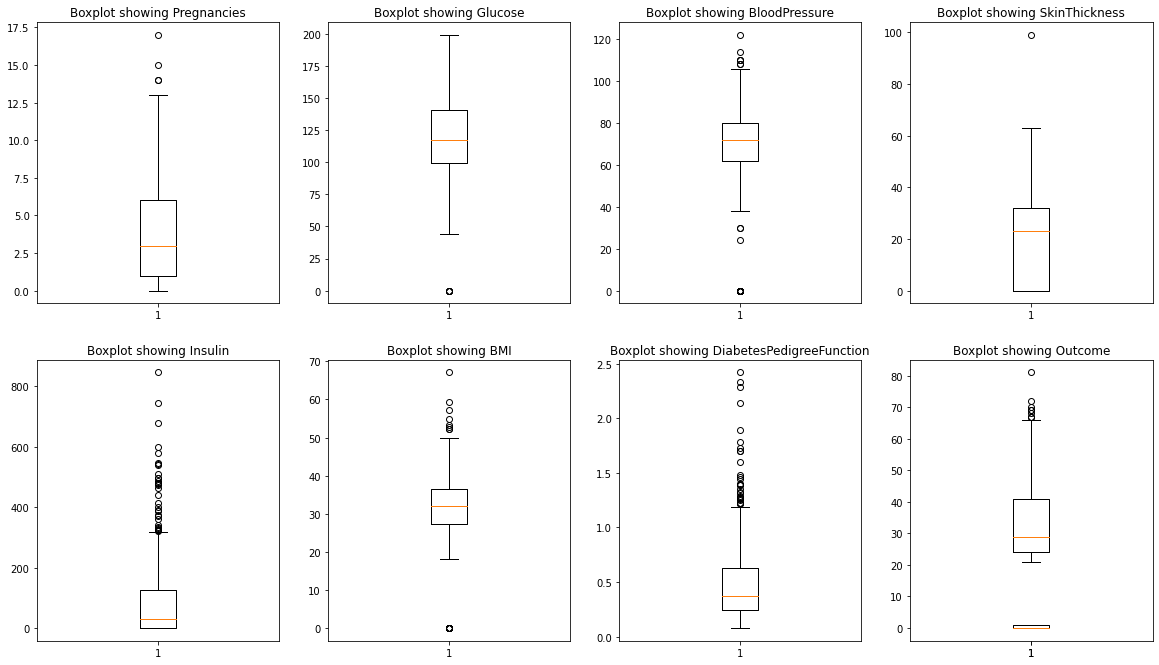

In [17]:
# checking for outliers
# making a dictionary for numerical columns
def outliers ():
    columns_dict = {'Pregnancies': 1, 'Glucose': 2, 'BloodPressure': 3, 'SkinThickness': 4, 'Insulin': 5, 'BMI': 6,
                    'DiabetesPedigreeFunction': 7, 'Age': 8, 'Outcome': 8}
    plt.figure(figsize=(20,30))
    for variable,i in columns_dict.items():
      plt.subplot(5,4,i);
      plt.boxplot(diab[variable]);
      plt.title(f"Boxplot showing {variable}");
    plt.show()
outliers()

      * Outliers exist in all the columns.
      * Outliers shall be retained as they contain pertinent information.

In [18]:
# we shall check whether the outliers will skew our data or not 
# making a dictionary for numerical columns
def check_skew():
    columns_dict = {'Pregnancies': 1, 'Glucose': 2, 'BloodPressure': 3, 'SkinThickness': 4, 'Insulin': 5, 'BMI': 6,
                    'DiabetesPedigreeFunction': 7, 'Age': 8}

    # make a max/min for each numerical column
    for variable,i in columns_dict.items():
      print('The minimum & the maximum value in', variable , 'is :' )
      print(diab[variable].min()),print(diab[variable].max())
      

check_skew()
 

The minimum & the maximum value in Pregnancies is :
0
17
The minimum & the maximum value in Glucose is :
0
199
The minimum & the maximum value in BloodPressure is :
0
122
The minimum & the maximum value in SkinThickness is :
0
99
The minimum & the maximum value in Insulin is :
0
846
The minimum & the maximum value in BMI is :
0.0
67.1
The minimum & the maximum value in DiabetesPedigreeFunction is :
0.078
2.42
The minimum & the maximum value in Age is :
21
81


#  **6. Exploratory Data Analysis**

##a) Univariate analysis

In [19]:
# Frequency distribution of features in the dataset
def frequency(data):
  for var in data.columns:
      print(data[var].value_counts())

frequency(diab)

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26 

Histograms

<Figure size 1000x300 with 0 Axes>

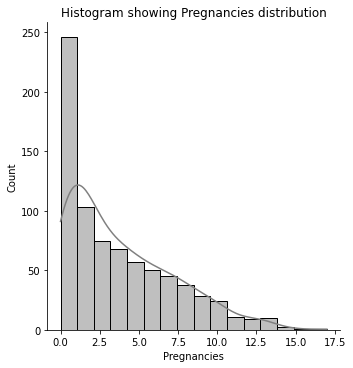

<Figure size 1000x300 with 0 Axes>

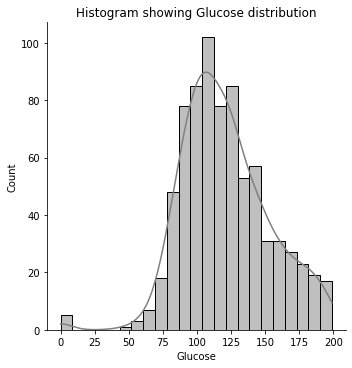

<Figure size 1000x300 with 0 Axes>

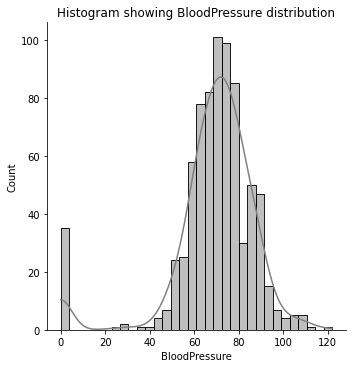

<Figure size 1000x300 with 0 Axes>

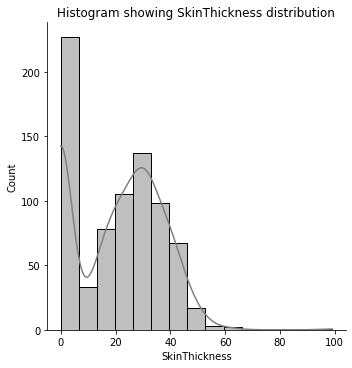

<Figure size 1000x300 with 0 Axes>

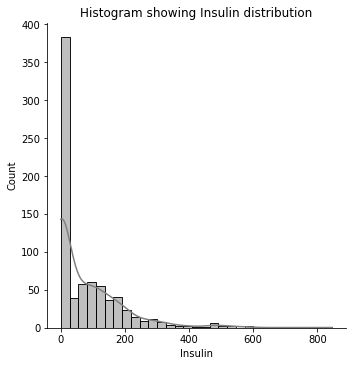

<Figure size 1000x300 with 0 Axes>

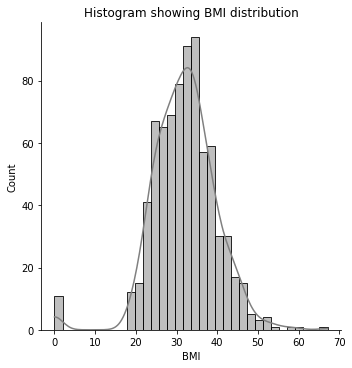

<Figure size 1000x300 with 0 Axes>

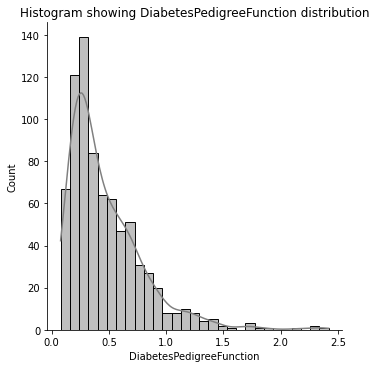

<Figure size 1000x300 with 0 Axes>

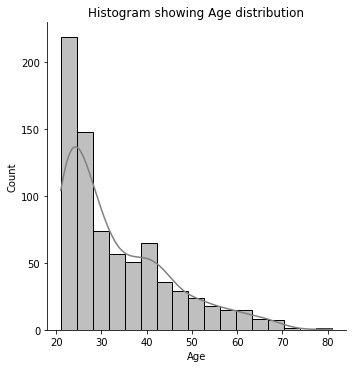

<Figure size 1000x300 with 0 Axes>

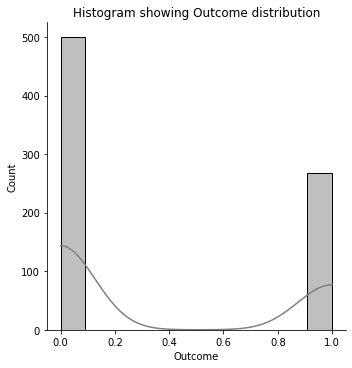

In [20]:
#PLotting histrograms for categorical values
def histogram (v):
    columns_dict = diab.columns
    for i in columns_dict:
      plt.figure(figsize = (10,3), dpi=100)
      sns.displot(v[i], kde = True, color = 'grey')
      plt.title(f"Histogram showing {i} distribution", color = 'Black')
      plt.show()

histogram (diab)

Examining the Target Variable

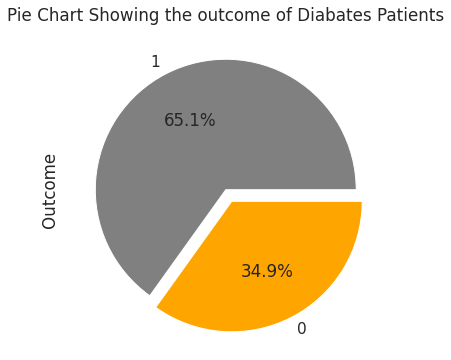

In [21]:
# Creating pie charts for columns
def pie(x,column):
  data=x[column].value_counts()
  sns.set(font_scale=1.4)
  plt.figure(figsize=(7,6))
  explode = (0, 0.1)
  colors = ['grey','orange']
  pie=data.plot.pie(autopct='%1.1f%%',labels=(x[column].unique()),startangle=0,explode=explode, colors = colors)
  pie.set_title("Pie Chart Showing the outcome of Diabates Patients")
  
pie(diab,'Outcome')


##b) Bivariate Analysis

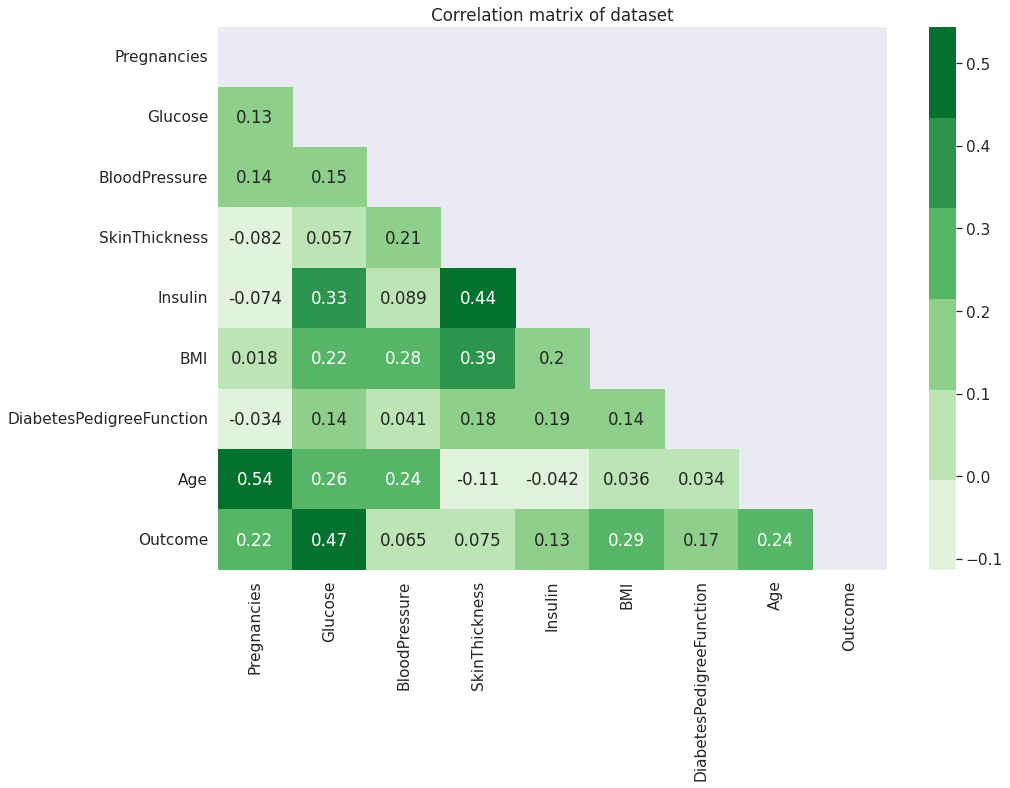

In [22]:
## Plotting a correlation matrix
def Cormatrix (h):
      plt.subplots(figsize=(15,10))
      mask = np.triu(np.ones_like(h.corr()))
      colormap = sns.color_palette("Greens")
      dataplot = sb.heatmap(h.corr(), cmap=colormap, annot=True, mask=mask)
      dataplot.set_title("Correlation matrix of dataset")
      mp.show()

Cormatrix (diab)

#**7. Feature Importance**

In [23]:
#Lets make a copy of the diab dataset before we can start breaking it down for parts 
diab1_0 = diab.copy()

In [24]:
#Reading libraries
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#plotting libraries
import seaborn as sns
from sklearn.tree import export_graphviz,plot_tree
import graphviz
# Decision trees libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
# Splitting Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#Accuracy Checking Libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,normalize

In [25]:
diab1_0.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
X= diab1_0.drop(columns="Outcome")
y= diab1_0.Outcome

In [27]:
# Dividing our data into training and test sets usindg 80% of our dataset to train the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

*Accuracy score*

In [29]:
# Specifying use of the decision tree model and accessing its accuracy
dectree=DecisionTreeClassifier(criterion='entropy')

# Training the Algorithm
dectree.fit(X_train,y_train)

# Making Predictions
y_pred=dectree.predict(X_test)

# Evaluating the Algorithm
accuracy=metrics.accuracy_score(y_test,y_pred)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 73.37662337662337 %


*Confusion matrix*

In [30]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[76 23]
 [18 37]]


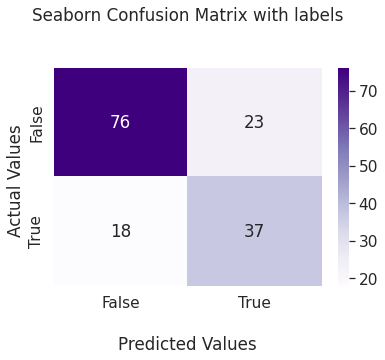

In [31]:
#Visualizing the confusion matrix on a heatmap
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

*F1 SCore (Precision & recall)*

In [32]:
from sklearn.metrics import f1_score
# f1 score
score1 = f1_score(y_pred, y_test)
# print
print("Decision tree F1 score is: ", format(score1))

Decision tree F1 score is:  0.6434782608695652


                          Importance
SkinThickness               0.064897
Insulin                     0.075966
DiabetesPedigreeFunction    0.084865
Pregnancies                 0.109600
Age                         0.116135
BloodPressure               0.118994
BMI                         0.152738
Glucose                     0.276806


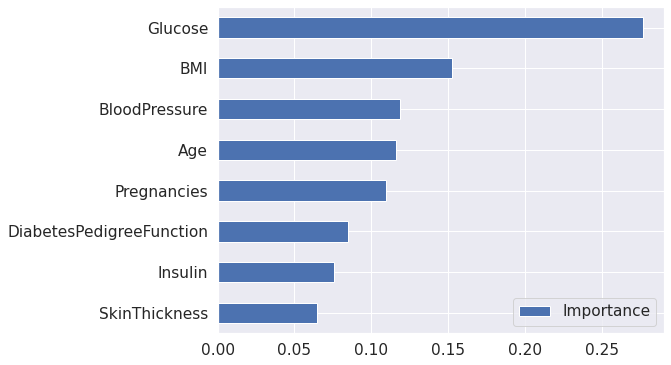

In [33]:
# Assessing columns significance
def sig (data):
    feature= data.drop(columns="Outcome")
    dfimportance0=pd.DataFrame(dectree.feature_importances_,feature.columns,columns=['Importance'])
    indices = np.argsort(feature)
    dfimportance0 = dfimportance0.sort_values('Importance')
    dfimportance0.plot(kind='barh',figsize=(8,6))
    print(dfimportance0)

sig (diab)

## **Feature Enginnering**

In [34]:
#Lets make a copy of the diab dataset before we can start breaking it down for parts 
diab2_0 = diab.copy()
diab3_0 = diab.copy()

In [35]:
#Lets preview the top part of the dataset
diab.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

### Age Feature

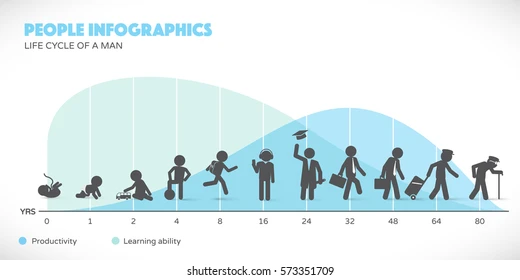

In [36]:
#Lets now feature engineer different classes of age
diab['Class_Age']=pd.cut(diab['Age'],bins=[20,35,50,diab['Age'].max()],labels=['young','mature','senior'])

In [37]:
#Lets preview the value counts of the specified class
diab.Class_Age.value_counts()

young     498
mature    189
senior     81
Name: Class_Age, dtype: int64

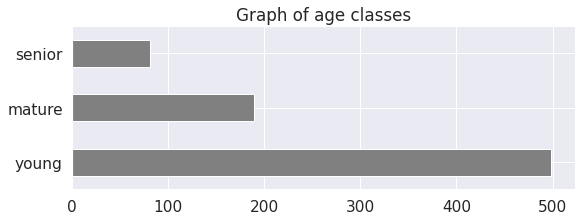

In [38]:
##Lets visualize the value counts of the specified class
diab.Class_Age.value_counts().plot(kind ='barh',color = 'grey',figsize=(9,3) , title='Graph of age classes')

### BMI Feature

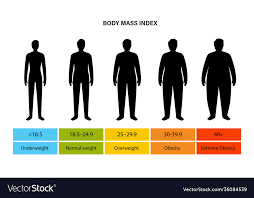

In [39]:
#Lets now feature engineer different classes of BMI
diab['Class_BMI']=pd.cut(diab['BMI'],bins=[0,18.4,24.9,29.9,34.9,39.9,diab['BMI'].max()]
                             ,labels=['Under_weight','Normal_weight','Pre-obesity','Obesity_class_I','Obesity_class_II',
                                      'Obesity_class_III'])

In [40]:
#Lets preview the value counts of the specified class
diab.Class_BMI.value_counts()

Obesity_class_I      224
Pre-obesity          179
Obesity_class_II     150
Normal_weight        102
Obesity_class_III     98
Under_weight           4
Name: Class_BMI, dtype: int64

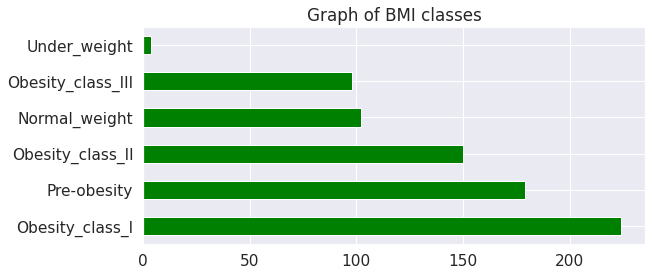

In [41]:
#Lets visualize the value counts of the specified class
diab.Class_BMI.value_counts().plot(kind ='barh',color = 'green',figsize=(9,4), title='Graph of BMI classes')

### Glucose Feature



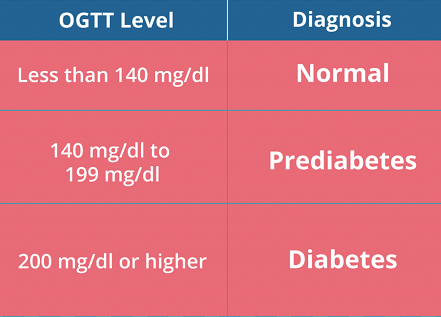

In [42]:
diab['Glucose'].max(),diab['Glucose'].min()

(199, 0)

In [43]:
#Lets now feature engineer different classes of Glucose
diab['Class_Glucose']=pd.cut(diab['Glucose'],bins=[0,140,200,diab['Insulin'].max()]
                                 ,labels=['Normal','Prediabetes','Diabetes'])

In [44]:
#Lets preview the value counts of the specified class
diab.Class_Glucose.value_counts()

Normal         571
Prediabetes    192
Diabetes         0
Name: Class_Glucose, dtype: int64

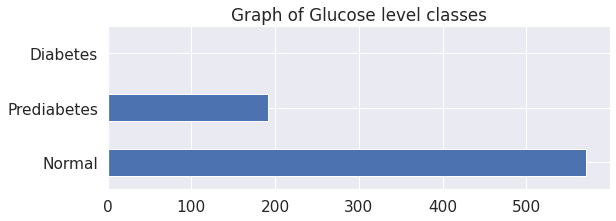

In [45]:
#Lets visualize the value counts of the specified class
diab.Class_Glucose.value_counts().plot(kind ='barh',figsize=(9,3), title='Graph of Glucose level classes')

### Blood Pressure Feature

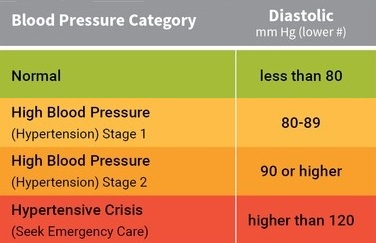

In [46]:
#Lets now feature engineer different classes of Blood pressure
diab['Class_BloodPressure'] = pd.cut(diab['BloodPressure'], bins = [0,80, 90, 120,200], 
                                         labels=["Normal", "Hypertension_Stage1","Hypertension_Stage2", 
                                          "Hypertensive_Crisis"])


In [47]:
#Lets preview the value counts of the specified class
diab.Class_BloodPressure.value_counts()

Normal                 568
Hypertension_Stage1    127
Hypertension_Stage2     37
Hypertensive_Crisis      1
Name: Class_BloodPressure, dtype: int64

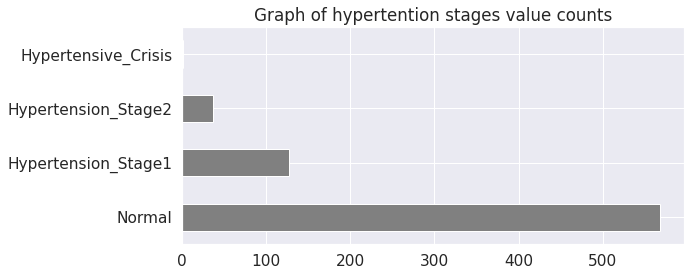

In [48]:
#Lets visualize the value counts of the specified class
diab.Class_BloodPressure.value_counts().plot(kind ='barh', color = 'grey',figsize=(9,4), title='Graph of hypertention stages value counts')

### Insulin Feature

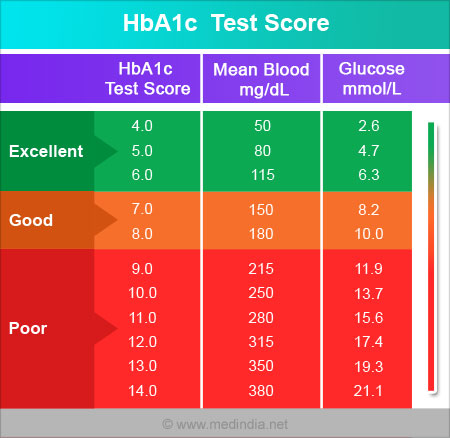

In [49]:
#Lets now feature engineer different classes of insulin
diab['Class_Insulin']=pd.cut(diab['Insulin'],bins=[0,100,126,diab['Insulin'].max()],
                                 labels=['Low_Anormal','Normal','High_Anormal'])

In [50]:
#Lets preview the value counts of the specified class
diab.Class_Insulin.value_counts()

High_Anormal    193
Low_Anormal     151
Normal           50
Name: Class_Insulin, dtype: int64

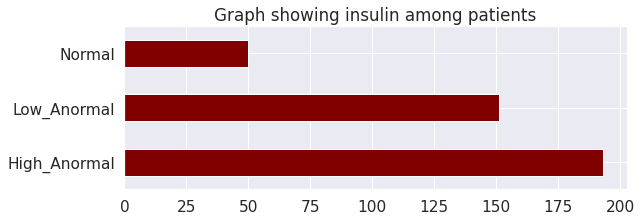

In [51]:
#Lets visualize the value counts of the specified class
diab.Class_Insulin.value_counts().plot(kind ='barh', color = 'maroon',figsize=(9,3), title='Graph showing insulin among patients')

In [52]:
#Lets now feature engineer different classes of Glucose
diab['Class_ratings']=pd.cut(diab['Glucose'],bins=[0,140,diab['Insulin'].max()]
                                 ,labels=['Normal','Prediabetes & Diabetes'])

In [53]:
#Lets preview the value counts of the specified class
diab.Class_ratings.value_counts()

Normal                    571
Prediabetes & Diabetes    192
Name: Class_ratings, dtype: int64

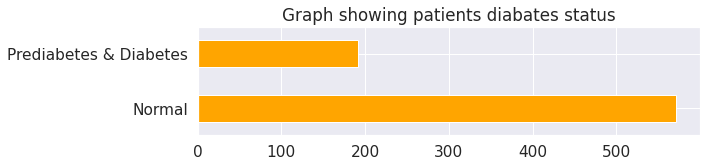

In [54]:
#Lets visualize the value counts of the specified class
diab.Class_ratings.value_counts().plot(kind ='barh', color = 'orange',figsize=(9,2), title='Graph showing patients diabates status')

In [55]:
#Lets preview the featured class
diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome Class_Age          Class_BMI  \
0                     0.627   50        1    mature    Obesity_class_I   
1                     0.351   31        0     young        Pre-obesity   
2                     0.672   32        1     young      Normal_weight   
3                     0.167   21        0     young        Pre-obesity   
4                     2.288   33        1     young  Obesity_class_III   

  Class_Glucose Class_BloodPressure Class_Insulin           Class_ratings  
0   Prediabetes              Normal           NaN  Prediabetes & Diabetes  
1        Normal              Normal           NaN                  Normal  
2   Prediabetes              Normal           NaN  Prediabetes & Diabetes  
3        Normal              Normal   Low_Anormal                  Normal  
4        Normal              Normal  High_Anormal                  Normal

In [56]:
#checking the shape of our dataset
def shape_data (data):
    return ('Number of records in our obesity dataset is: ' + str(data.shape))
shape_data(diab)

'Number of records in our obesity dataset is: (768, 15)'

#**Initial Merging of Nutrition and Diabetes Datasets(Concept1)**

In [57]:
#Lets preview the food dataset
nutrio.head()

Unnamed: 0             name serving_size  calories total_fat saturated_fat  \
0           0       Cornstarch        100 g       381      0.1g           NaN   
1           1     Nuts, pecans        100 g       691       72g          6.2g   
2           2    Eggplant, raw        100 g        25      0.2g           NaN   
3           3   Teff, uncooked        100 g       367      2.4g          0.4g   
4           4  Sherbet, orange        100 g       144        2g          1.2g   

  cholesterol    sodium  choline     folate  ...      fat  \
0           0   9.00 mg   0.4 mg   0.00 mcg  ...   0.05 g   
1           0   0.00 mg  40.5 mg  22.00 mcg  ...  71.97 g   
2           0   2.00 mg   6.9 mg  22.00 mcg  ...   0.18 g   
3           0  12.00 mg  13.1 mg          0  ...   2.38 g   
4         1mg  46.00 mg   7.7 mg   4.00 mcg  ...   2.00 g   

  saturated_fatty_acids monounsaturated_fatty_acids  \
0               0.009 g                     0.016 g   
1               6.180 g                    40.801 g   
2               0.034 g                     0.016 g   
3               0.449 g                     0.589 g   
4               1.160 g                     0.530 g   

  polyunsaturated_fatty_acids fatty_acids_total_trans alcohol     ash  \
0                     0.025 g                 0.00 mg   0.0 g  0.09 g   
1                    21.614 g                 0.00 mg   0.0 g  1.49 g   
2                     0.076 g                 0.00 mg   0.0 g  0.66 g   
3                     1.071 g                       0       0  2.37 g   
4                     0.080 g                 1.00 mg   0.0 g  0.40 g   

  caffeine theobromine    water  
0  0.00 mg     0.00 mg   8.32 g  
1  0.00 mg     0.00 mg   3.52 g  
2  0.00 mg     0.00 mg  92.30 g  
3        0           0   8.82 g  
4  0.00 mg     0.00 mg  66.10 g  

[5 rows x 77 columns]

In [58]:
#Preview the nutrition data
nutrio.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [59]:
#Check the specified column categories
nutrio.carbohydrate.unique()

array(['91.27 g', '13.86 g', '5.88 g', ..., '11.32 g', '21.53 g',
       '66.28 g'], dtype=object)

In [60]:
#previewing the specified column to see whether the extensions have been dealt with
nutrio['carbohydrate']

0       91.27 g
1       13.86 g
2        5.88 g
3       73.13 g
4       30.40 g
         ...   
8784     0.00 g
8785     0.00 g
8786     0.00 g
8787     0.00 g
8788     0.00 g
Name: carbohydrate, Length: 8789, dtype: object

In [61]:
#Lets now remove the special characters of metrics on carbohydrates' numerical columns
nutrio['carbohydrate'] = nutrio['carbohydrate'].str.replace('xg$|g$|kg$|ml$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [62]:
#Lets preview the column to see if it worked
nutrio['carbohydrate']

0       91.27 
1       13.86 
2        5.88 
3       73.13 
4       30.40 
         ...  
8784     0.00 
8785     0.00 
8786     0.00 
8787     0.00 
8788     0.00 
Name: carbohydrate, Length: 8789, dtype: object

In [63]:
#convert the column to a float datatype
nutrio['carbohydrate'] = nutrio['carbohydrate'].astype(float).round(2)

In [64]:
#Lets now feature engineer different classes of carbohydrates level
#This is the first concept we tried to use to group different classes of carbohydarates to be matched with 
#the corresponding diabetic patient.
nutrio['Class_ratings']=pd.cut(nutrio['carbohydrate'],bins=[0,33,nutrio['carbohydrate'].max()],
                                  labels=['Prediabetes & Diabetes','Normal'])

In [65]:
# Checking the clusters of carbohydrates
nutrio.carbohydrate.min(),nutrio.carbohydrate.max()

(0.0, 100.0)

*Merging Diabetes dataset and nutrion assignment based on carbohydrate level of the food and the individuals blood sugar.*

In [66]:
# Merging the diabetes and nutrion dataset on the created class
Nutrio_diab = diab.merge(nutrio, how = 'left', on = 'Class_ratings')
Nutrio_diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            6      148             72             35        0  33.6   
2            6      148             72             35        0  33.6   
3            6      148             72             35        0  33.6   
4            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  Outcome Class_Age  ...      fat  \
0                     0.627   50        1    mature  ...  71.97 g   
1                     0.627   50        1    mature  ...   0.18 g   
2                     0.627   50        1    mature  ...   2.00 g   
3                     0.627   50        1    mature  ...   0.28 g   
4                     0.627   50        1    mature  ...   0.74 g   

  saturated_fatty_acids monounsaturated_fatty_acids  \
0               6.180 g                    40.801 g   
1               0.034 g                     0.016 g   
2               1.160 g                     0.530 g   
3               0.130 g                     0.034 g   
4               0.151 g                     0.060 g   

  polyunsaturated_fatty_acids fatty_acids_total_trans  alcohol     ash  \
0                    21.614 g                 0.00 mg    0.0 g  1.49 g   
1                     0.076 g                 0.00 mg    0.0 g  0.66 g   
2                     0.080 g                 1.00 mg    0.0 g  0.40 g   
3                     0.031 g                 0.00 mg    0.0 g  0.76 g   
4                     0.307 g                 0.00 mg    0.0 g  1.92 g   

  caffeine  theobromine    water  
0  0.00 mg      0.00 mg   3.52 g  
1  0.00 mg      0.00 mg  92.30 g  
2  0.00 mg      0.00 mg  66.10 g  
3  0.00 mg      0.00 mg  92.07 g  
4  0.00 mg      0.00 mg  85.66 g  

[5 rows x 92 columns]

In [67]:
#previewing the Merged dataset columns
Nutrio_diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Class_Age',
       'Class_BMI', 'Class_Glucose', 'Class_BloodPressure', 'Class_Insulin',
       'Class_ratings', 'Unnamed: 0', 'name', 'serving_size', 'calories',
       'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'choline',
       'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin',
       'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'me

In [68]:
# Formatting the initial thought process we had
nutrion_match = Nutrio_diab.groupby(['Class_ratings','name'])['carbohydrate'].mean()
nutrion_match

Class_ratings           name                                                                              
Normal                  ANDREA'S, Gluten Free Soft Dinner Roll                                                40.24
                        APPLEBEE'S, crunchy onion rings                                                       40.17
                        APPLEBEE'S, french fries                                                              39.50
                        ARCHWAY Home Style Cookies, Chocolate Chip Ice Box                                    65.02
                        ARCHWAY Home Style Cookies, Coconut Macaroon                                          61.23
                                                                                                              ...  
Prediabetes & Diabetes  Yogurt, sweetened with low-calorie sweetener, nonfat milk, vanilla or lemon flavor     7.50
                        Yogurt, whole milk, fruit, Greek                         

- Afterwards we so it fit to explore other more direct methods.

# **8. Implementing the Solution**

## **a) Machine Learning(Supervised Learning)**

**Resampling**

resampling.svg

- Because we are dealing with a medical dataset, we wanted an accurate depiction of the model performance without inflation from (information/data) leakage. The data leakage happens when knowledge of the held out test-set leaks into the data used to train the model.
- To avoid this, we saw it fit to normalize the data by resampling after splitting the data into individual training and test sets. Then standardizing them individually/independently so that no information is shared between the training and the test samples.
- This in turn will provide a more accurate estimate of model performance without data leakage.

In [69]:
# separating the data and labels
X = diab2_0.drop(['Outcome','SkinThickness','DiabetesPedigreeFunction'], axis=1)
y = diab2_0['Outcome']

**Splitting our dataset into training and test sets**

In [70]:
# Dividing our data into training and test sets usindg 80% of our dataset to train the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**The training set has class imbalance**

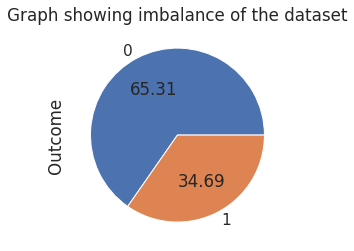

In [71]:
# # Show pie plot of the imbalance of the dataset
y_train.value_counts().plot.pie(autopct='%.2f', title='Graph showing imbalance of the dataset')

**Performing Random Oversampling on the training data**

- "not majority" = resample all classes but the majority class

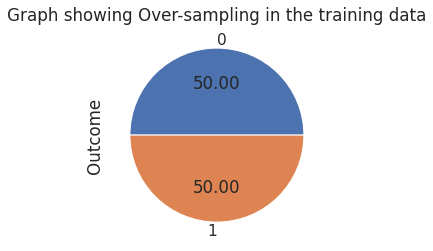

In [72]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

ax = y_train_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Graph showing Over-sampling in the training data")

In [73]:
#Lets check the corrected class imbalance
y_train_res.value_counts()

0    401
1    401
Name: Outcome, dtype: int64

In [74]:
#Lets check the corrected class imbalance
X_train_res.value_counts()

Pregnancies  Glucose  BloodPressure  Insulin  BMI   Age
0            105      84             0        27.9  62     5
             119      0              0        32.4  24     5
6            134      80             370      46.2  46     5
3            107      62             48       22.9  23     4
5            166      76             0        45.7  27     4
                                                          ..
2            130      96             0        22.6  21     1
             129      84             0        28.0  27     1
                      74             205      33.2  25     1
                      0              0        38.5  41     1
0            57       60             0        21.7  67     1
Length: 614, dtype: int64

**Performing Random Oversampling on the test data**

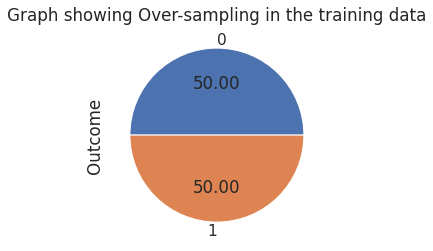

In [75]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_test_res, y_test_res = ros.fit_resample(X_test, y_test)

ax = y_test_res .value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Graph showing Over-sampling in the training data")

In [76]:
X_test_res.value_counts()

Pregnancies  Glucose  BloodPressure  Insulin  BMI   Age
13           158      114            0        42.3  44     4
0            109      88             0        32.5  38     4
5            137      108            0        48.8  37     4
11           136      84             130      28.3  42     3
8            183      64             0        23.3  32     3
                                                          ..
2            121      70             95       39.1  23     1
             122      70             0        36.8  27     1
             123      48             165      42.1  26     1
             139      75             0        25.6  29     1
3            187      70             200      36.4  36     1
Length: 154, dtype: int64

In [77]:
#Scaling the data so that we achieve a uniform scale of judgement
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test_res = sc.transform(X_test_res)

In [78]:
#Lets preview the outcome
print(X.shape, X_train_res.shape, X_test_res.shape)

(768, 6) (802, 6) (198, 6)


### **i) Support Vector Machines**

In [79]:
#Creating a classifier fro the SVM model
classifier = svm.SVC(kernel='linear')

In [80]:
#training the support vector Machine Classifier
classifier.fit(X_train_res, y_train_res)

SVC(kernel='linear')

**Model evaluation**

*Accuracy Score*

In [81]:
# accuracy score on the training data
X_train_res_prediction = classifier.predict(X_train_res)
training_data_accuracy = accuracy_score(X_train_res_prediction, y_train_res)

In [82]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7668329177057357


In [83]:
# accuracy score on the test data
X_test_res_prediction = classifier.predict(X_test_res)
test_data_accuracy = accuracy_score(X_test_res_prediction, y_test_res)

In [84]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.696969696969697


In [85]:
# Making Predictions
y_pred=classifier.predict(X_test_res)

# Evaluating the Algorithm
accuracy=metrics.accuracy_score(y_test_res,y_pred)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 69.6969696969697 %


*Confusion Matrix*

In [86]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_res, y_pred)

print(cf_matrix)

[[68 31]
 [29 70]]


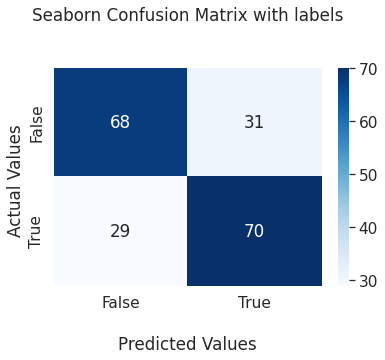

In [87]:
#Lets visualize the models performance

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

*Classification report*

In [88]:
#As advised the classification report comes after the confusion matrix
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69        99
           1       0.69      0.71      0.70        99

    accuracy                           0.70       198
   macro avg       0.70      0.70      0.70       198
weighted avg       0.70      0.70      0.70       198



*F1 Score (Recall & Precision)*

In [89]:
from sklearn.metrics import f1_score
# f1 score
score2 = f1_score(y_pred, y_test_res)
# print
print("SVM F1 score is: ", format(score2))


SVM F1 score is:  0.7000000000000001


*Hyperparameter Tuning*

In [90]:
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.665 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.689 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.756 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.702 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [91]:
# print best parameter after tuning
print(grid.best_params_) 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [92]:
# Building a Gaussian kernel SVC also known as the rbf model
clf = svm.SVC(kernel='rbf',gamma=1,C=100)
clf.fit(X_train_res,y_train_res)
predclf=clf.predict(X_test_res)
accuracysvm=metrics.accuracy_score(y_test_res,predclf)
print('The accuracy of the model is',str(accuracysvm *100),'%')

The accuracy of the model is 62.62626262626263 %


- Optimization makes matters worse for the test set prediction.

*F1 Score (Recall & precision)*

In [93]:
from sklearn.metrics import f1_score
# f1 score
score4 = f1_score(predclf, y_test_res)
# print
print("SVM F1 score is: ", format(score4))

SVM F1 score is:  0.5795454545454545


### **ii) Random Forest**

In [94]:
#Creating a classifier from the Random Forest model

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200)

*Accuracy Score*

In [95]:
#Checking accuracy of prediction in regards to the training set

rfc_train = rfc.predict(X_train_res)
print("Accuracy_Score =", format(metrics.accuracy_score(y_train_res, rfc_train)))

Accuracy_Score = 1.0


- This model is over-fitted for training predictions

In [96]:
#Checking accuracy of prediction in regards to the test set

predictions = rfc.predict(X_test_res)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test_res, predictions)))

Accuracy_Score = 0.7222222222222222


In [97]:
# Making Predictions
y_pred=rfc.predict(X_test_res)

# Evaluating the Algorithm
accuracy=metrics.accuracy_score(y_test_res,y_pred)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 72.22222222222221 %


*Confusion Matrix*

In [98]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_res, y_pred)

print(cf_matrix)

[[72 27]
 [28 71]]


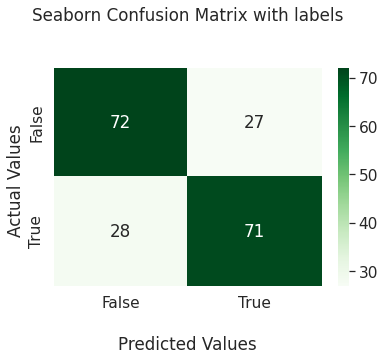

In [99]:
#Lets visualize the models performance

ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

*Classification report*

In [100]:
#Lets measure the quality of predictions 
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        99
           1       0.72      0.72      0.72        99

    accuracy                           0.72       198
   macro avg       0.72      0.72      0.72       198
weighted avg       0.72      0.72      0.72       198



*F1 Score (Recall & Precision*)

In [101]:
from sklearn.metrics import f1_score
# f1 score
score3 = f1_score(y_pred, y_test_res)
# print
print("SVM F1 score is: ", format(score3))

SVM F1 score is:  0.7208121827411168


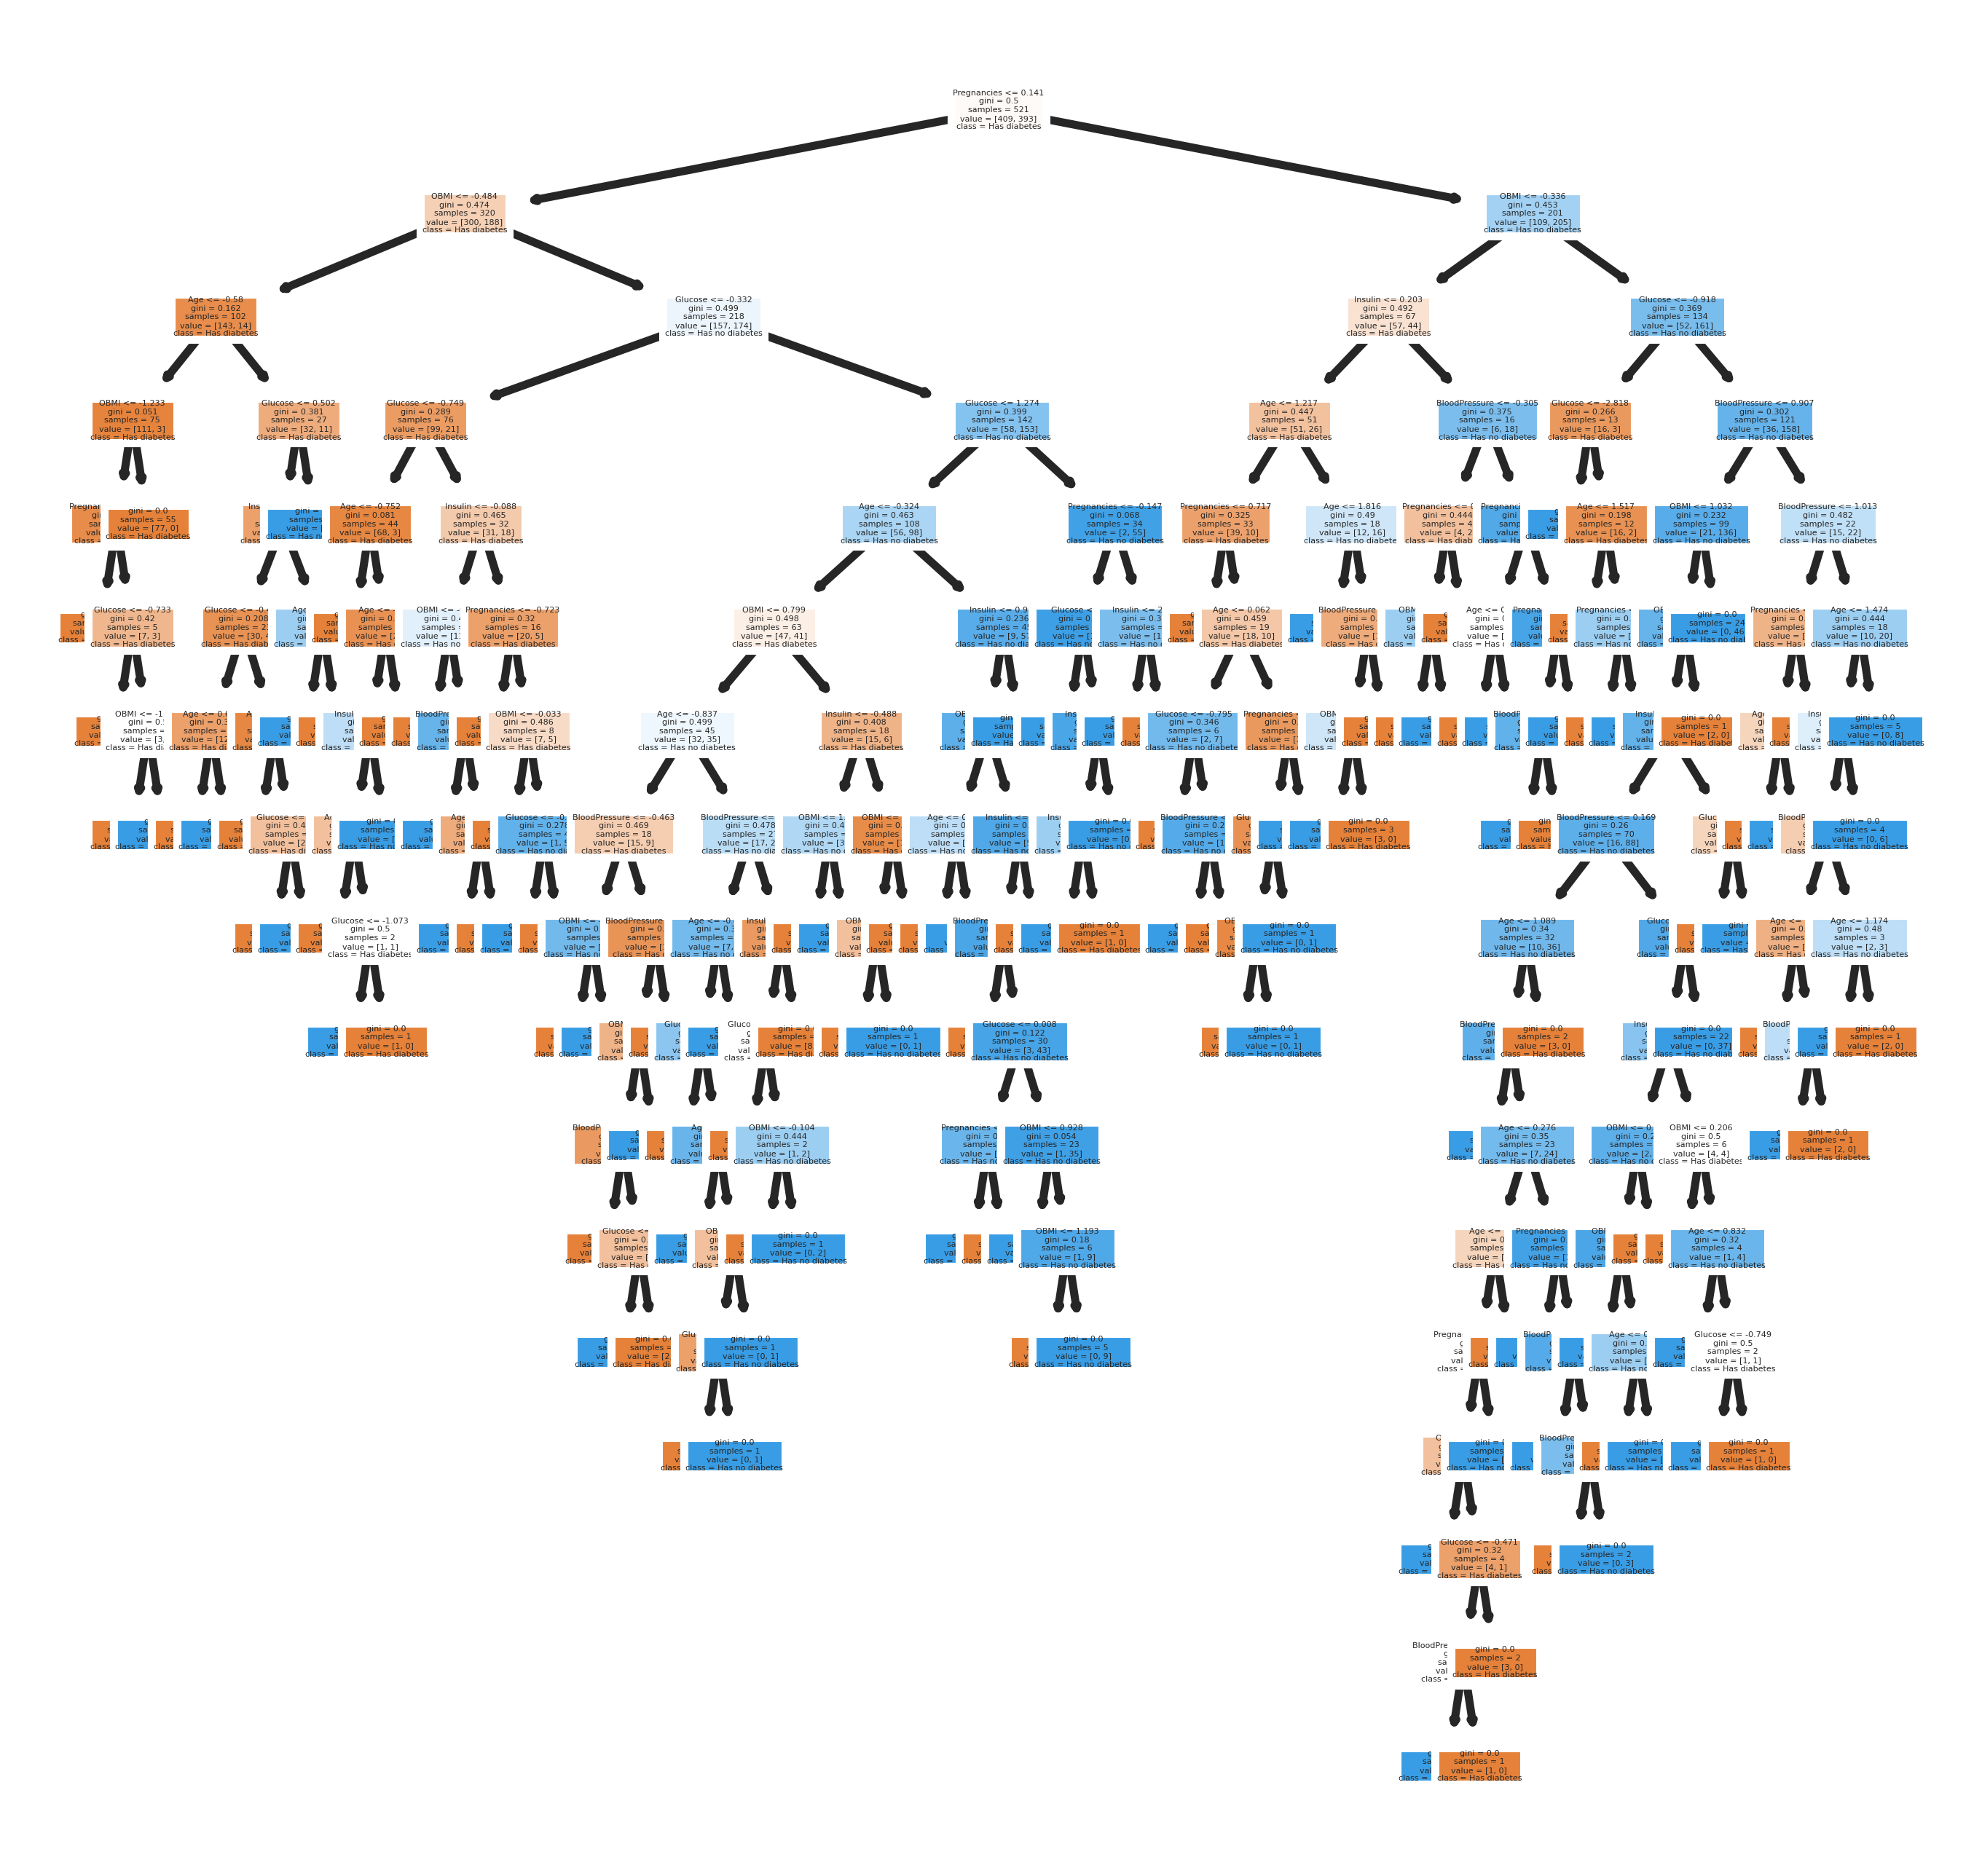

In [102]:
# Splitting the variables as defined
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'OBMI', 'Age']
Class=['Has diabetes','Has no diabetes']
# Visualizing the Random forest tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = features, 
               class_names=Class,
               filled = True);
fig.savefig('rfc_individualtree.png')

###**iii) Extreme Gradient Boost**

In [103]:
# Lets train the model
import xgboost as xgb

# Creating the model
naive_model = xgb.XGBClassifier()
# Lets fit the model
naive_trained_model =  naive_model.fit(X_train_res,y_train_res)

*Accuracy Score*

In [104]:
# Lets make predictions using the train set
naive_prediction = naive_trained_model.predict(X_train_res)

# Lets check for the accuracy

accuracy = accuracy_score(naive_prediction, y_train_res)
accuracy

0.8927680798004988

In [105]:
# Lets make predictions on the test data
naive_test_prediction = naive_trained_model.predict(X_test_res)
# Lets check for the accuracy
accuracy_2 = accuracy_score(naive_test_prediction,y_test_res)
accuracy_2

0.7373737373737373

In [106]:
naive_test_prediction = naive_trained_model.predict(X_test_res)
# Evaluating the Algorithm
accuracy=metrics.accuracy_score(y_test_res,naive_test_prediction)
print('The accuracy of the model is',str(accuracy *100),'%')

The accuracy of the model is 73.73737373737373 %


*Confusion Matrix*

In [107]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_res, naive_test_prediction)

print(cf_matrix)

[[70 29]
 [23 76]]


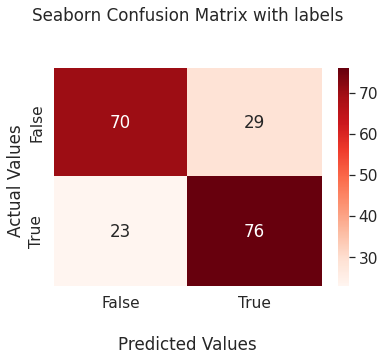

In [108]:
#Lets visualize the models performance

ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Classifcation report

In [109]:
#Lets measure the quality of predictions 
print(classification_report(y_test_res, naive_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.72      0.77      0.75        99

    accuracy                           0.74       198
   macro avg       0.74      0.74      0.74       198
weighted avg       0.74      0.74      0.74       198



*F1 Score (Recall & Precision)*

In [110]:
from sklearn.metrics import f1_score
# f1 score
score7 = f1_score(naive_test_prediction, y_test_res)
# print
print("SVM F1 score is: ", format(score7))

SVM F1 score is:  0.7450980392156863


*HyperParameter Tuning*

In [111]:
# Creating the model
# tuned_model = xgb.XGBRFClassifier(n_estimators=700, max_depth=8, 
    #                               learning_rate=0.1, subsample=0.5)
tuned_model = xgb.XGBRFClassifier(n_estimators=850,learning_rate = 0.2,
                                  subsample= 0.55)
# Lets fit the model
htuned_model = tuned_model.fit(X_train_res,y_train_res)

*Accuracy Score*

In [112]:
# Lets make predictions using the train dataset
tuned_predictions = htuned_model.predict(X_train_res)
# Lets check for accuracy
accuracy = accuracy_score(tuned_predictions,y_train_res)
accuracy

0.8067331670822943

In [113]:
# Lets make predictions using the test dataset
tuned_prediction = htuned_model.predict(X_test_res)
# Lets check for the accuracy
accuracy_ = accuracy_score(tuned_prediction,y_test_res)
accuracy_

0.7626262626262627

*F1 Score (Recall & Precision)*

In [114]:
from sklearn.metrics import f1_score
# f1 score
score8 = f1_score(tuned_prediction, y_test_res)
# print
print("SVM F1 score is: ", format(score8))

SVM F1 score is:  0.7729468599033815


*Plotting the xgboost tree*

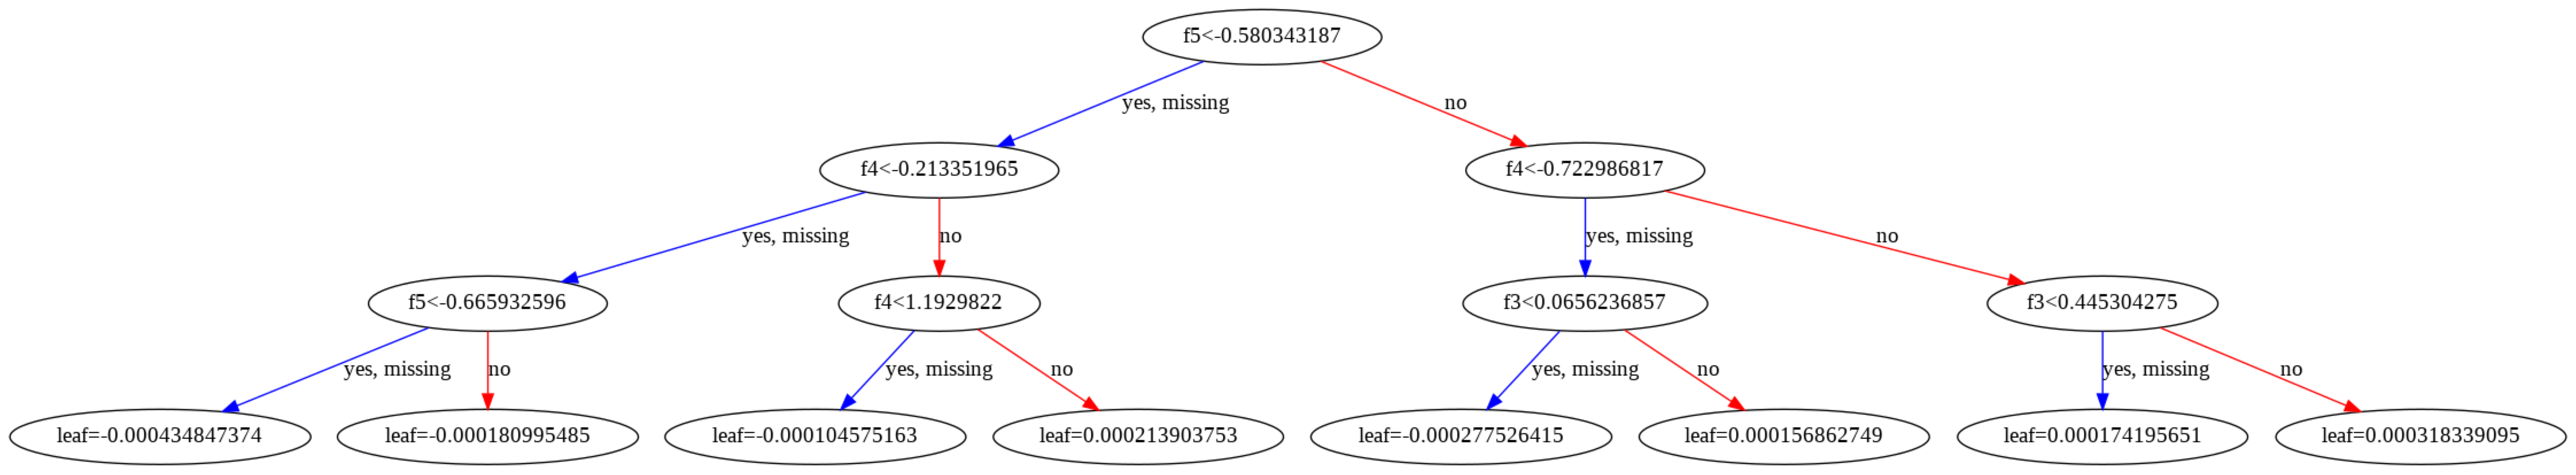

In [115]:
# plot single tree
from xgboost import plot_tree
from matplotlib.pylab import rcParams
plt.figure(figsize=(80,80)) 
xgb.plot_tree(htuned_model, ax=plt.gca())
plt.show()

### **iv) K-Nearest Neighbors**

In [116]:
# Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_res, y_train_res)
# Predict the Test set results
y_pred = classifier.predict(X_test_res)

In [117]:
# Evaluating the KNN model
print(accuracy_score(y_test_res, y_pred))
print(confusion_matrix(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))

0.6818181818181818
[[65 34]
 [29 70]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67        99
           1       0.67      0.71      0.69        99

    accuracy                           0.68       198
   macro avg       0.68      0.68      0.68       198
weighted avg       0.68      0.68      0.68       198



*Confusion Matrix*

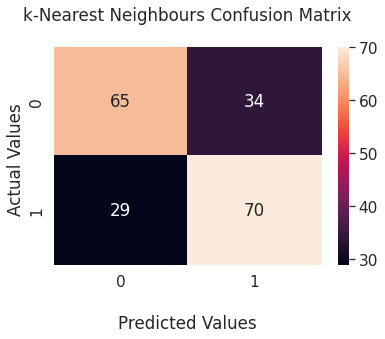

In [118]:
# Visualizing the confusion matrix using a Heatmap
cm=confusion_matrix(y_test_res,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('k-Nearest Neighbours Confusion Matrix\n')
plt.xlabel('\nPredicted Values')
plt.ylabel('Actual Values ')
plt.show()



*F1 Score (Recall & Precision)*

In [119]:
from sklearn.metrics import f1_score
# f1 score
score6 = f1_score(y_pred, y_test_res)
# print
print("SVM F1 score is: ", format(score6))

SVM F1 score is:  0.6896551724137931


*Parameter Tuning*

In [120]:
#Using Grid search Cv to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,20, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
# using GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [121]:
# Making prediction with the best parameters
KNN_1=grid_search_KNN.fit(X_train_res, y_train_res)
y_pred_KNN =KNN_1.predict(X_test_res)
#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ )

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


*Accuracy Score*

In [122]:
#Checking accuracy of prediction in regards to the test set
print(accuracy_score(y_test_res, y_pred_KNN))

0.7575757575757576


*F1 Score (Recall & Precision)*

In [123]:
from sklearn.metrics import f1_score
# f1 score
score5 = f1_score(y_pred_KNN, y_test_res)
# print
print("SVM F1 score is: ", format(score5))

SVM F1 score is:  0.7714285714285715


## **Deep Learning using Neural Networks**

### **v) Mlp Classifier**

In [124]:
# Lets train the model
from sklearn.neural_network import MLPClassifier
#Lets use an MLPclassifier
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_res,y_train_res)

predict_train = mlp.predict(X_train_res)
predict_test = mlp.predict(X_test_res)

*Classification report*

In [125]:
# Lets make predictions using the train dataset
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train_res,predict_train))
print(classification_report(y_train_res,predict_train))

[[313  88]
 [101 300]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       401
           1       0.77      0.75      0.76       401

    accuracy                           0.76       802
   macro avg       0.76      0.76      0.76       802
weighted avg       0.76      0.76      0.76       802



In [126]:
# Lets make predictions using the test dataset
print(confusion_matrix(y_test_res,predict_test))
print(classification_report(y_test_res,predict_test))

[[71 28]
 [26 73]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72        99
           1       0.72      0.74      0.73        99

    accuracy                           0.73       198
   macro avg       0.73      0.73      0.73       198
weighted avg       0.73      0.73      0.73       198



*F1 Score (Recall & Precision)*

In [127]:
# f1 score
score9 = f1_score(predict_test, y_test_res)
# print
print(" MLP F1 score is: ", format(score9))

 MLP F1 score is:  0.7300000000000001


### **vi) Sequential Layers**

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [129]:
# neural network using sigmoid as our activation function
# training with sigmoid activation function in the last layer took 27sec
model = Sequential()
model.add(Dense(32, input_shape=(6,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train_res, y_train_res, epochs=150, batch_size=10,validation_data=(X_test_res,y_test_res))
# evaluate the keras model
_, accuracy = model.evaluate(X_train_res, y_train_res)
print('Accuracy: %.2f' % (accuracy*100))
model.metrics_names

Epoch 1/150
81/81 [==============================] - 1s 7ms/step - loss: 0.6897 - accuracy: 0.5835 - val_loss: 0.6441 - val_accuracy: 0.7172
Epoch 2/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6259 - val_loss: 0.6269 - val_accuracy: 0.7172
Epoch 3/150
81/81 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6771 - val_loss: 0.6131 - val_accuracy: 0.7323
Epoch 4/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.7095 - val_loss: 0.6047 - val_accuracy: 0.7273
Epoch 5/150
81/81 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.7107 - val_loss: 0.6069 - val_accuracy: 0.7121
Epoch 6/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.7269 - val_loss: 0.6043 - val_accuracy: 0.7172
Epoch 7/150
81/81 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.7257 - val_loss: 0.5989 - val_accuracy: 0.7071
Epoch 8/150
8

['loss', 'accuracy']

In [130]:
#Printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0

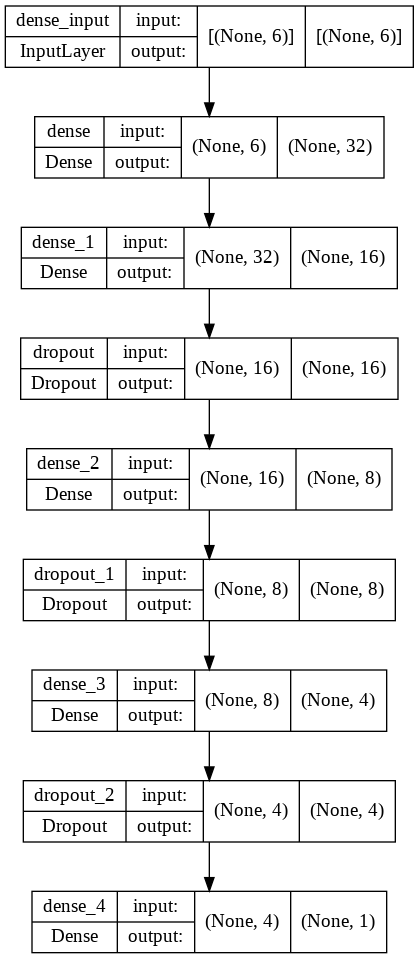

In [131]:
#Lets display our model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


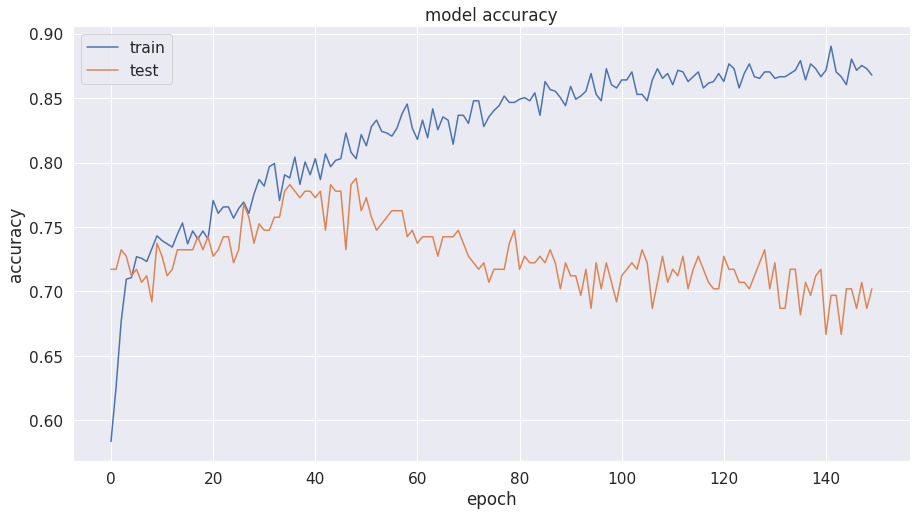

In [132]:
# summarize history for accuracy
print(history.history.keys())
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

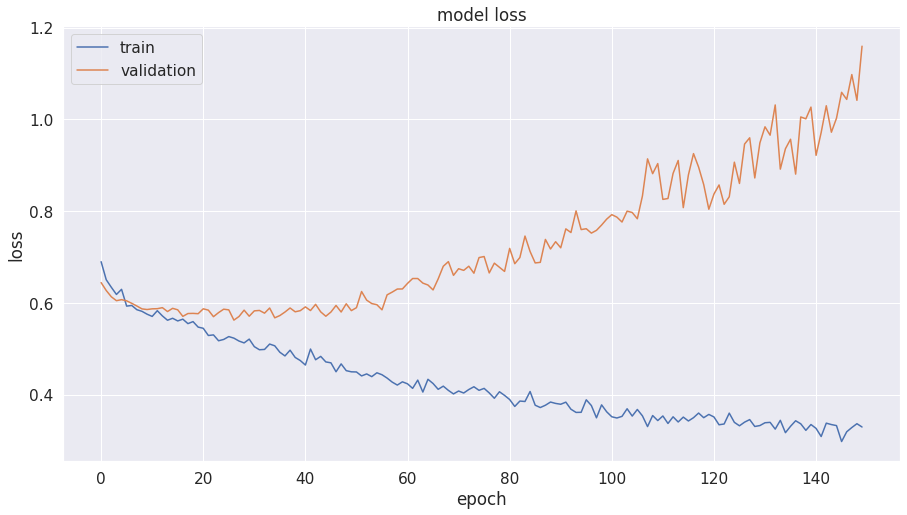

In [133]:
#summarize history for loss
plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [134]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(
    go.Scatter( y=history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter( y=history.history['loss'], name="Test_loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="Test_accuracy"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of ANN sequential Model"
)
# Set x-axis title
fig.update_xaxes(title_text="Epoch")
# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)
fig.show()

*Accuracy score (test set)*

In [135]:
#Checking the accuracy of the model on the test set
_, accuracy = model.evaluate(X_test_res, y_test_res)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 3ms/step - loss: 1.1597 - accuracy: 0.7020
Accuracy: 70.20


In [136]:
#Lets use an sequential MLPclassifier
# model.fit(X_train_res,y_train_res)
S_predict_train = (model.predict(X_train_res)> 0.5)
S_predicts_test = (model.predict(X_test_res)> 0.5)

*F1 Score (Recall & Precision)*

In [137]:
# f1 score
score10 = f1_score(S_predicts_test, y_test_res)
# print
print(" MLP F1 score is: ", format(score10))

 MLP F1 score is:  0.670391061452514


## **Different Model Prediction Outputs**

In [138]:
# Models vs r2 score.
models = ['Decision tree', 'Support Vector Machines', 'Random Forest', 'Hypertuned SVM','Hypertuned KNN', 'K-Nearest Neighbours', 'XGBoost' , 'Hypertuned XGBoost' , 'Neural networks(MLP)', 'Neural Networks(Sequential Layers)']
F1_scores = [score1,score2,score3,score4,score5,score6,score7,score8,score9,score10]
model_results = pd.DataFrame({'Classification models': models, 'F1_scores': F1_scores})
model_results.sort_values(by = 'F1_scores',axis=0,ascending=False)


Classification models  F1_scores
7                  Hypertuned XGBoost   0.772947
4                      Hypertuned KNN   0.771429
6                             XGBoost   0.745098
8                Neural networks(MLP)   0.730000
2                       Random Forest   0.720812
1             Support Vector Machines   0.700000
5                K-Nearest Neighbours   0.689655
9  Neural Networks(Sequential Layers)   0.670391
0                       Decision tree   0.643478
3                      Hypertuned SVM   0.579545

- From the model output we weighted model advantages over time and we first decided to go with the SVM classifier model as it levearges the hyperplane margin call, useful for our current set of data given its linear separable characteristics. But after more tests and consulatations, the hypertuned xgboost model became more favourable.

## **b) Machine Learning (Unsupervised Learning)**

### **Hierarchial Clustering**

In [139]:
# We first start by importing the relevant libraries
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering 

In [140]:
# Because our clustering should be unsupervised, we need to drop the target label
diab_unsup = diab2_0.drop(['Outcome','SkinThickness','DiabetesPedigreeFunction'], axis=1)

In [141]:
#select columns
X = diab_unsup
X.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  Age
0            6      148             72        0  33.6   50
1            1       85             66        0  26.6   31
2            8      183             64        0  23.3   32
3            1       89             66       94  28.1   21
4            0      137             40      168  43.1   33

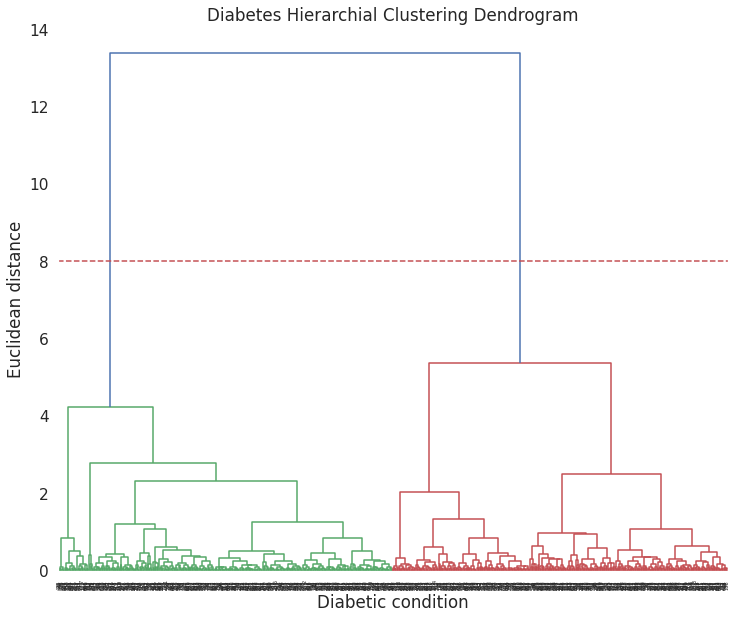

In [142]:
#Lets plot the dendrogram
X = preprocessing.normalize(X)
plt.figure(figsize=(12, 10))  
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=8, color='r', linestyle='--')
plt.title('Diabetes Hierarchial Clustering Dendrogram')
plt.xlabel('Diabetic condition')
plt.ylabel('Euclidean distance')
plt.show()

In [143]:
#Using a bottom up approach we settle on the 2 clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters= 2, affinity= 'euclidean', linkage= 'ward')
y_hc=hc.fit_predict(X)
y_hc

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

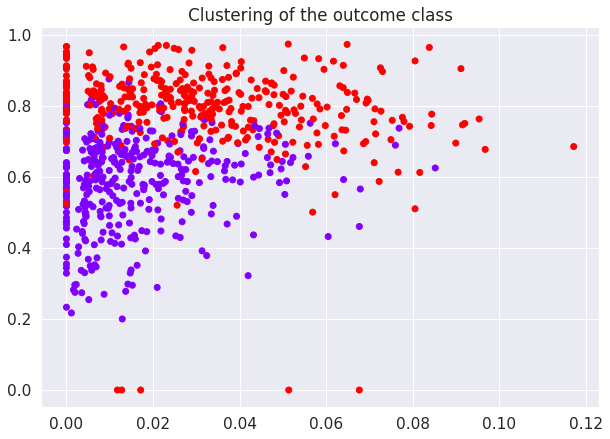

In [144]:
#2D plot of the two clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=hc.labels_, cmap='rainbow')
plt.title('Clustering of the outcome class')
plt.show()


- From this mapping we can nnow clearly see that our data had clusters that were not overlapping over a huge margin. Our data was linearly separable.

# **Making predictions (Using Supervised Learning)**

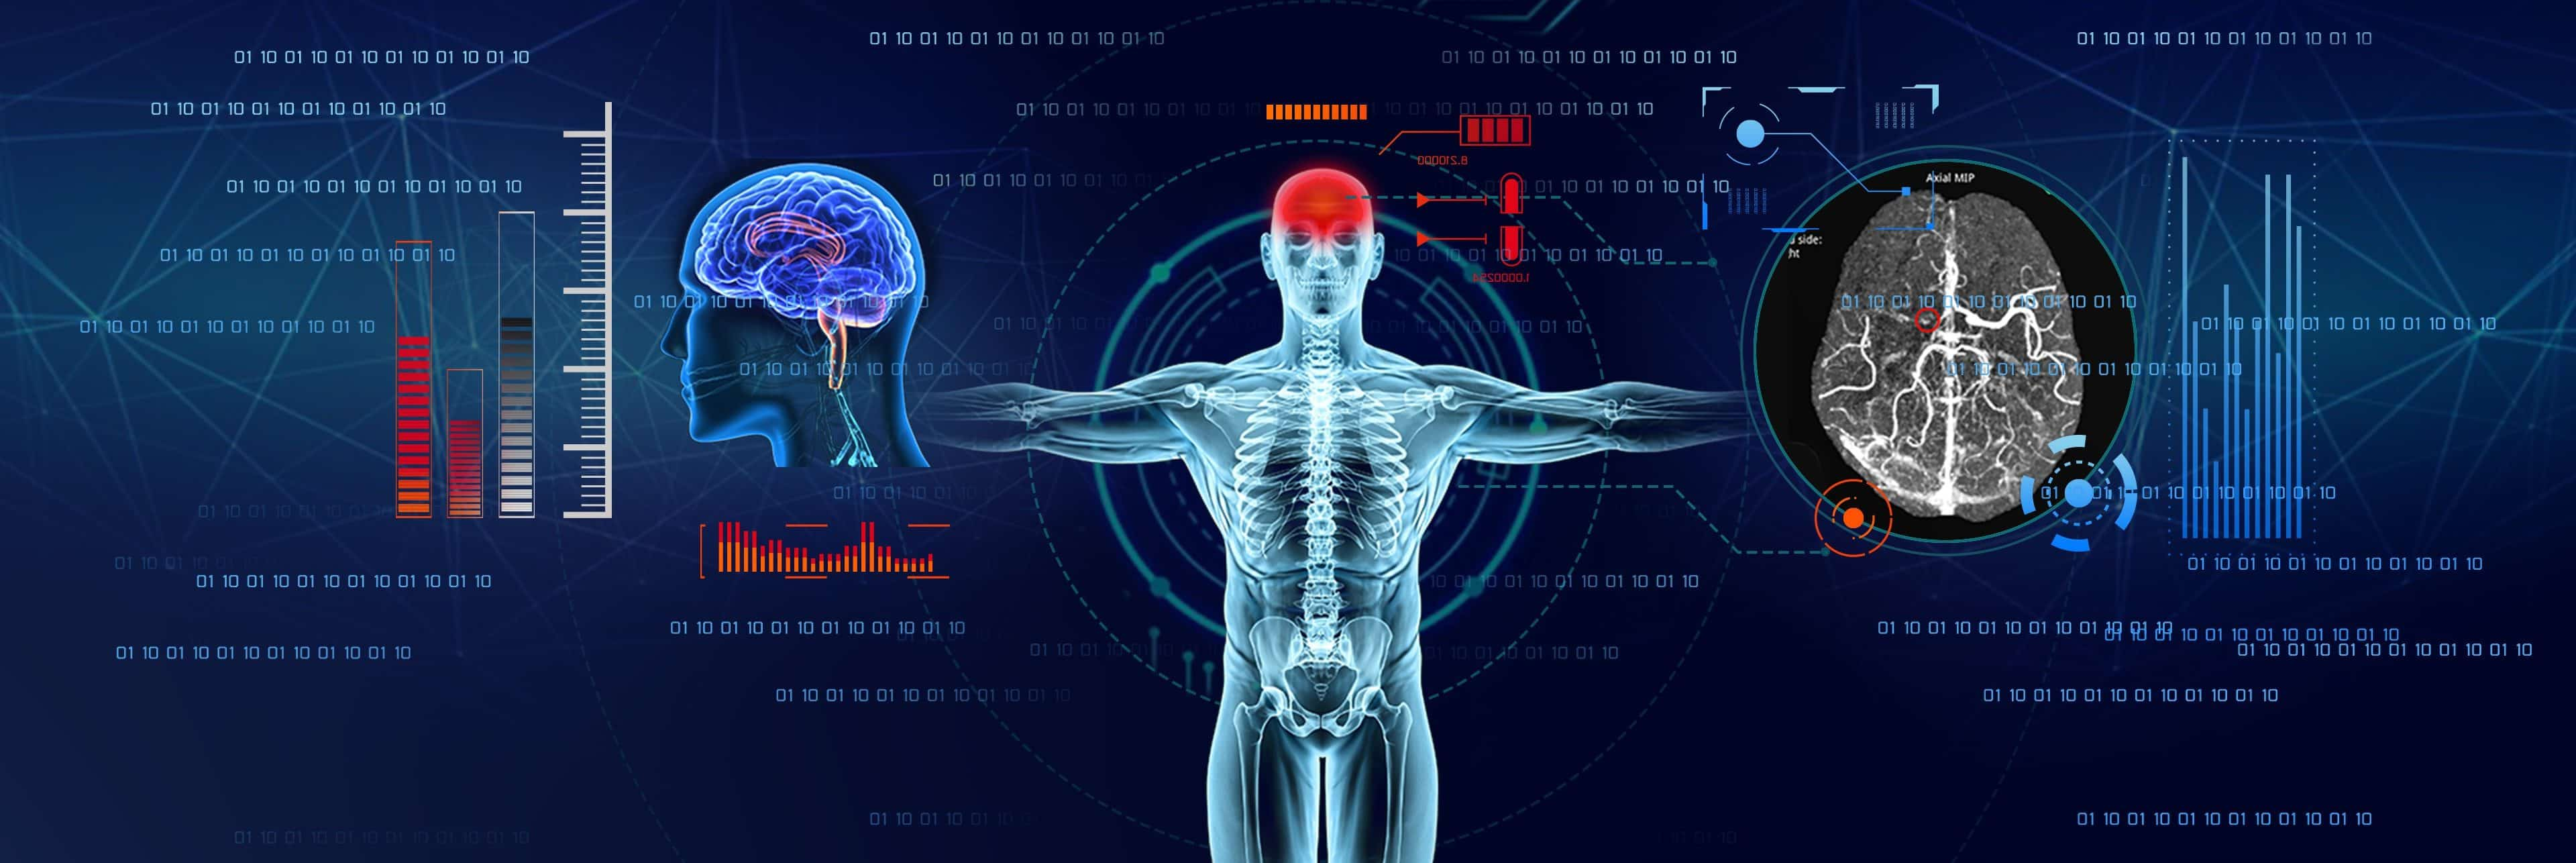

**Data security & safety consent framework**

In [145]:
# A fuction the provides the requisites for medical data collection & diagnosis
def Eurisko ():
    print('Please fill out this form for data collection consent')
    Q1=str(input("\nDo you wish to give your medical details in good faith?: y/n "))
    if Q1 == 'y':   
      Q2=str(input("\nDo you trust our ability to keep your data secure?: y/n ")) 
      if Q2== 'y': 
        Q3=str(input("\nDo you have the Eurisko diagnosis consent form? y/n ")) 
        if Q3 == 'y': 
          Data_col ()
        else:
          print("\nGet a copy of the consent form to proceed") 
      else:
        print("\nThank you for using Eurisko") 
    else:
      print("\nThank you for using Eurisko") 

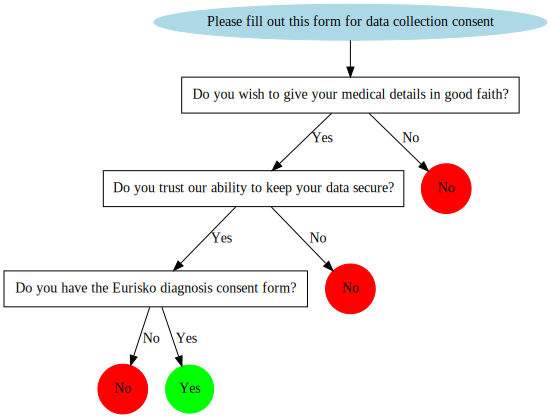

In [146]:
#Creating a consent channel before collecting private info
styles = {
    'top': {'shape': 'ellipse', 'style': 'filled', 'color': 'lightblue'},
    'no':  {'shape': 'circle', 'style': 'filled', 'color': 'red'},
    'yes': {'shape': 'circle', 'style': 'filled', 'color': 'green'},
    'qst': {'shape': 'rect'}
}
example_tree = Digraph()
example_tree.node('top', 'Please fill out this form for data collection consent', styles['top'])
example_tree.node('q1', 'Do you wish to give your medical details in good faith?', styles['qst'])
example_tree.node('q2', 'Do you trust our ability to keep your data secure?', styles['qst'])
example_tree.node('no1', 'No ', styles['no'])
example_tree.node('q3', 'Do you have the Eurisko diagnosis consent form?', styles['qst'])
example_tree.node('no2', 'No ', styles['no'])
example_tree.node('no3', 'No ', styles['no'])
example_tree.node('yes', 'Yes', styles['yes'])
example_tree.edge('top', 'q1')
example_tree.edge('q1', 'q2', 'Yes')
example_tree.edge('q1', 'no1', 'No')
example_tree.edge('q2', 'q3', 'Yes')
example_tree.edge('q2', 'no2', 'No')
example_tree.edge('q3', 'yes', 'Yes')
example_tree.edge('q3', 'no3', 'No')
example_tree

- A Patient or an individual will only be diagonized by Eurisko when the model receives the proverbial (green light) so to speak. LOL!

**Callable local variable function** (*Data collection function*)

In [147]:
# input_data = (5,166,72,175,25.8,51) Outcome 1
def Data_col ():
      the_name =str(input("\nEnter your name: "))
      the_name = the_name.upper()
      the_location=str(input("Enter your location: "))
      the_location = the_location.upper()
      the_gender=str(input("Are you male or female: "))
      if the_gender == 'male':  
        A=0    
      else: 
        A=int(input("How many times have you been pregnant: "))
      B=int(input("Enter your plasma glucose concentration level in (mg/dl): ")) 
      C=int(input("Enter your diastolic Blood pressure in (mm Hg): ")) 
      D=int(input("Enter your serum insulin levels in (mu U/ml) : ")) 
      K=float(input("Enter the your weight in KG: "))
      M=float(input("Enter the height in meters: "))
      F=int(input("Enter the Age in years: "))
      E = K / (M**2)  
      print("Your BMI is:", E)
      model_pred (A,B,C,D,E,F,the_name,the_location)
      spoon_feed()
      Food_recommend (A,B,C,D,E,F,the_name,the_location)

**Food recommendation function**

In [148]:
def Food_recommend (A,B,C,D,E,F,the_name,the_location):
      print("GENERAL DIET RECOMMENDATION\n")
      print("Blood sugar levels\n")
      if B <= 140:  
            print("You have normal blood sugar levels.")  
            print("Your diet isn't limited,stay healthy.")
            print("***************************************")
      elif B<= 200:  
            print("You have pre-diabetic blood sugar levels.")
            print("Your diet is limited to foods with low glycemic indexes,exercise and stay healthy.")
            print("***************************************")
      else:   
            print("You have diabetic blood sugar levels.")
            print("Your diet is limited to foods with low glycemic indexes,seek treatment to stay healthy.")  
            print("***************************************")  
      print("\nBlood pressure levels\n")  
      if C <= 80:  
            print("You have normal diastolic blood pressure levels.")  
            print("Your diet isn't limited,stay healthy.")
            print("***************************************")
      elif C <= 90:  
            print("You have hypertension stage 1.")
            print("Your diet is limited to foods with less salt,low fat,exercise and stay healthy.")
            print("***************************************")
      elif C <= 120:  
            print("You have hypertension stage 2.")
            print("Your diet is limited to foods with less salt,low fat,seek treatment to stay healthy.")
            print("***************************************")
      else:   
            print("You have hypertension crisis.")
            print("seek treatment to stay healthy")  
            print("***************************************") 
      print("\nInsulin concentration\n")
      if D <= 100:  
            print("You have low anormal insulin levels.")  
            print("Your diet is limited,Go for carbs in fruits, veggies, whole grains,\nbeans, and low-fat dairy instead of processed foods\nlike white bread and pasta. Whole grains that haven't been turned into flour are even better")
            print("***************************************")
      elif D <= 126:  
            print("You have normal insulin levels.")
            print("Your diet isn't limited,stay healthy.")
            print("***************************************")
      else:   
            print("You have high anormal insulin levels.")
            print("seek treatment to stay healthy")  
            print("***************************************") 
      print("\nBMI levels\n")
      if E <= 18.5:  
            print("You are underweight.")
            print("Improve your diet with body building foods to stay healthy.") 
            print("***************************************\n")           
      elif E <= 24.9:  
            print("Awesome! You are healthy.")  
            print("Your diet isn't limited,stay healthy.")
            print("***************************************\n")
      elif E <= 29.9:  
            print("Caution! You are over-weight.")
            print("Your diet is limited to low carb,low cholestrol foods,stay healthy.")
            print("***************************************\n")
      else:  
            print("Sorry! You are obese.")
            print("Your diet is limited to low carb,low cholestrol foods,seek treatment to stay healthy.") 
            print("***************************************\n")     

**The final prediction function referencing the model**

In [149]:
def model_pred (A,B,C,D,E,F,the_name,the_location):
      input_data = (A,B,C,D,E,F)
      # changing the input_data to numpy array
      input_data_as_numpy_array = np.asarray(input_data)
      # reshape the array as we are predicting for one instance
      input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
      # standardize the input data
      std_data = sc.transform(input_data_reshaped)
      #Using the model to make the prediction
      prediction = htuned_model.predict(std_data)
      global P
      P=prediction
      print(prediction)
      print("***************************************\n")
      if (prediction[0] == 0):
        print(the_name,'FROM',the_location, 'BE AT EASE,YOU ARE NOT DIABETIC\n')
      else:
        print(the_name,'FROM',the_location,'BE ADVISED THAT YOU ARE DIABETIC\n')
      print("***************************************")

In [150]:
# #Calling the prediction and recommendation function 
# Eurisko ()

#**9. Food Data Analysis(Recommendation Assessment)**

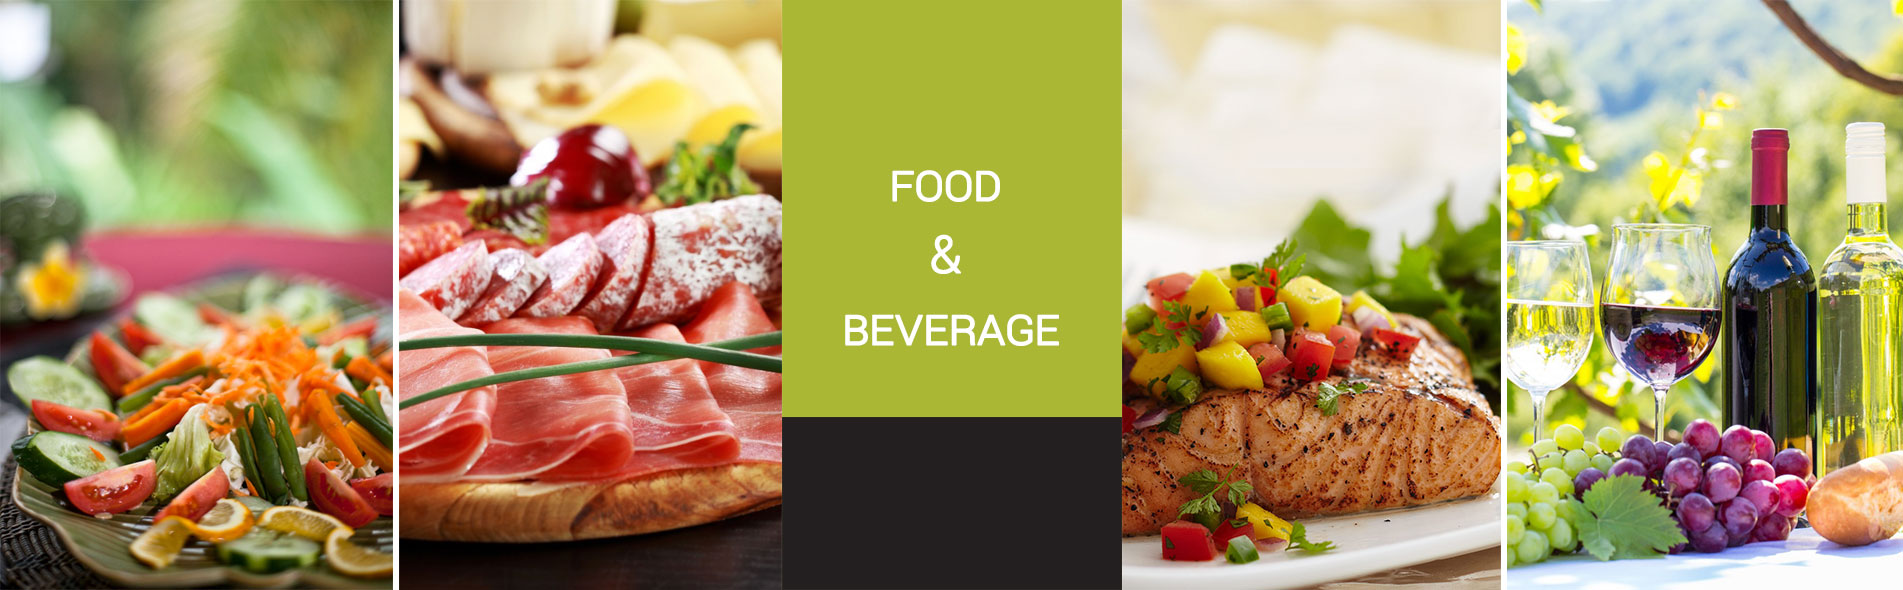

In [151]:
#Lets load in the dataset for to used for recommendation
Dataset ="/content/glycemicindex.xlsx"
def read (data):
  return pd.read_excel(data)

glyc = read(Dataset)
glyc.head()

FOOD  \
0                       Banana cake, made with sugar   
1                    Banana cake, made without sugar   
2                                 Sponge cake, plain   
3  Vanilla cake made from packet mix with vanilla...   
4                             Apple, made with sugar   

   Glycemic index (glucose = 100) Serving size (grams)  \
0                              47                   60   
1                              55                   60   
2                              46                   63   
3                              42                  111   
4                              44                   60   

   Glycemic load per serving  Unnamed: 4 Category  
0                         14         NaN    Baked  
1                         12         NaN    Baked  
2                         17         NaN    Baked  
3                         24         NaN    Baked  
4                         13         NaN    Baked

##a) Data Cleaning

In [152]:
#Lets preview the data info
def disp (data):
  print("OUR DATA INFO IS AS FOLLOWS;")
  print(data.info())
  print("*************************************")
  print("THE DATASET HAD THESE NO: OF COLUMNS")
  print(data.columns)
  print("*************************************")
  print("THE DATA HAD THESE AMOUNT OF MISSING VALUES")
  print(data.isnull().sum())
  print("*************************************")
  
disp(glyc)

OUR DATA INFO IS AS FOLLOWS;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FOOD                            112 non-null    object 
 1   Glycemic index (glucose = 100)  112 non-null    int64  
 2   Serving size (grams)            112 non-null    object 
 3   Glycemic load per serving       112 non-null    int64  
 4   Unnamed: 4                      0 non-null      float64
 5   Category                        112 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.4+ KB
None
*************************************
THE DATASET HAD THESE NO: OF COLUMNS
Index(['FOOD', 'Glycemic index (glucose = 100)', 'Serving size (grams)',
       'Glycemic load per serving', 'Unnamed: 4', 'Category'],
      dtype='object')
*************************************
THE DATA HAD THESE AMOUNT OF MISSING VALU

In [153]:
#checking the shape of our dataset
def shape_data (data):
    return ('Number of records in our obesity dataset is: ' + str(data.shape))
shape_data(glyc)

'Number of records in our obesity dataset is: (112, 6)'

In [154]:
#previwing the glycemic dataset columns
glyc.columns

Index(['FOOD', 'Glycemic index (glucose = 100)', 'Serving size (grams)',
       'Glycemic load per serving', 'Unnamed: 4', 'Category'],
      dtype='object')

In [155]:
#Lets start with the data prep
glyc= glyc.drop(columns='Unnamed: 4')
glyc.head(1)

FOOD  Glycemic index (glucose = 100)  \
0  Banana cake, made with sugar                              47   

  Serving size (grams)  Glycemic load per serving Category  
0                   60                         14    Baked

In [156]:
#Renaming the column names
glyc.rename(columns = {'Glycemic index (glucose = 100)':'Glycemic_index', 'Glycemic load per serving':'Glycemic_load'}, inplace = True)

## b) Feature Enginnering

### *Glycemic Class*

In [157]:
#First we need to convert the datatype to intergers before segmenting it
glyc['Glycemic_index'] = glyc['Glycemic_index'].astype(int)

In [158]:
#Lets now feature engineer different classes of aglycemic index
glyc['Glycemic_Class']= pd.cut(glyc['Glycemic_index']
       ,bins=[0,55,70,glyc['Glycemic_index'].max()]
       ,labels=['Low glycemic index','Mid glycemic index','High glycemic index'])

In [159]:
#Lets preview the results
glyc.head()

FOOD  Glycemic_index  \
0                       Banana cake, made with sugar              47   
1                    Banana cake, made without sugar              55   
2                                 Sponge cake, plain              46   
3  Vanilla cake made from packet mix with vanilla...              42   
4                             Apple, made with sugar              44   

  Serving size (grams)  Glycemic_load Category      Glycemic_Class  
0                   60             14    Baked  Low glycemic index  
1                   60             12    Baked  Low glycemic index  
2                   63             17    Baked  Low glycemic index  
3                  111             24    Baked  Low glycemic index  
4                   60             13    Baked  Low glycemic index

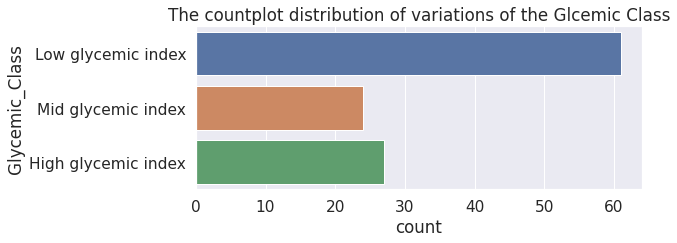

In [160]:
#A count plot for the outcome classificaton
def outcome_class(n):
      plt.figure(figsize=(8,3))
      plt.title("The countplot distribution of variations of the Glcemic Class")
      ax = sns.countplot(y=n, data=n)
outcome_class(glyc['Glycemic_Class'])

In [161]:
# Category of food selection palette
selection = glyc.groupby(['Category','FOOD'])['Glycemic_index'].mean()
selection

Category    FOOD                                   
Baked       100% Whole Grain™ bread (Natural Ovens)    51.0
            50% cracked wheat kernel bread             58.0
            Apple, made with sugar                     44.0
            Apple, made without sugar                  48.0
            Bagel, white, frozen                       72.0
                                                       ... 
Vegetables  Green peas, average                        51.0
            Instant mashed potato, average             87.0
            Parsnips                                   52.0
            Sweet potato, average                      70.0
            Yam, average                               54.0
Name: Glycemic_index, Length: 112, dtype: float64

In [162]:
# Glycemic index selection palette
selection2 = glyc.groupby(['Glycemic_Class','FOOD'])['Glycemic_index'].mean()
selection2

Glycemic_Class       FOOD                                   
Low glycemic index   100% Whole Grain™ bread (Natural Ovens)    51.0
                     50% cracked wheat kernel bread              NaN
                     All-Bran™, average                         55.0
                     Apple juice, unsweetened, average          44.0
                     Apple, average                             39.0
                                                                ... 
High glycemic index  White wheat flour bread                    71.0
                     Whole wheat bread, average                 71.0
                     Whole wheat kernels, average                NaN
                     Wonder™ bread, average                     73.0
                     Yam, average                                NaN
Name: Glycemic_index, Length: 336, dtype: float64

Baked         21
Fruits        13
Breakfast     12
Grains        10
Beans         10
Beverage       8
Vegetables     8
Snacks         7
Cookies        6
Noodles        6
Dairy          5
Pizza          2
Nuts           1
Salad          1
Chicken        1
Honey          1
Name: Category, dtype: int64

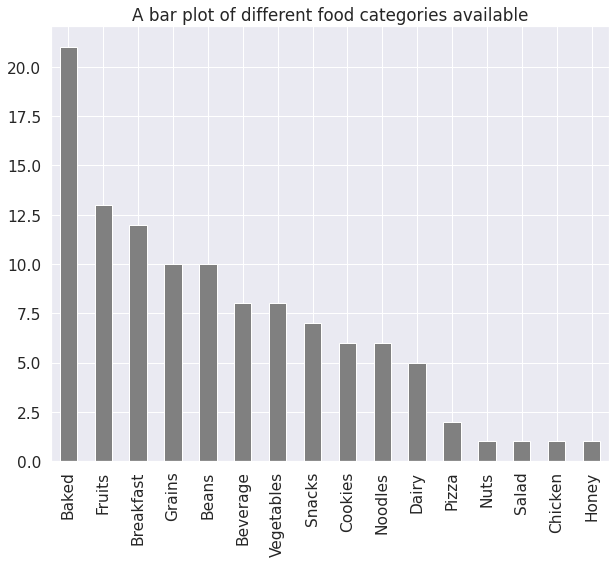

In [163]:
#Visualizing the food categories
glyc['Category'].value_counts().plot(kind="bar", title="A bar plot of different food categories available"
,figsize=(10,8), color = 'grey')
glyc['Category'].value_counts()


*Creation of a function that suggests food based on Eurisko predictions*

In [164]:
#This function recommends food based on The initial Eurisko diagnosis
def spoon_feed():
      # prediction=int(input("Are you diabetic? 1 for yes/0 for no: "))
      choice=str(input("\nDo you wish to look through foods recommended for you? y/n: "))
      if (choice == 'y') & (P == 1): 
            print("\n***************************************\n")  
            print("FOOD CATEGORIES.\n")
            print("['Baked', 'Beverage', 'Breakfast', 'Grains'\n, 'Cookies', 'Dairy','Fruits', 'Beans',\n 'Nuts', 'Noodles', 'Snacks', 'Vegetables',\n'Salad', 'Chicken', 'Pizza', 'Honey']\n") 
            category= str(input("Select category of food you wish for.\n"))
            recommend = glyc[(glyc['Category']==category) & (glyc['Glycemic_Class']=='Low glycemic index')]
            print("\nHere is a list of",category, "to choose from\n",recommend.iloc[:,[0,1,5]] ) 
            print("\n***************************************")
            print("WE RECOMMEND",category.upper(), "WITH LOW GLYCEMIC INDEXES") 
            print("***************************************\n")           
      elif choice == 'n': 
            print("\n***************************************")
            print("Thank you & stay healthy")  
            print("***************************************\n")
      elif (choice == 'y') & (P == 0): 
            print("\n***************************************\n")  
            print("FOOD CATEGORIES.\n")
            print("['Baked', 'Beverage', 'Breakfast', 'Grains'\n, 'Cookies', 'Dairy','Fruits', 'Beans',\n 'Nuts', 'Noodles', 'Snacks', 'Vegetables',\n'Salad', 'Chicken', 'Pizza', 'Honey']\n") 
            category= str(input("Select category of food you wish for.\n"))
            recommend = glyc[(glyc['Category']==category)]
            print("\nHere is a list of",category,"to choose from:\n",recommend.iloc[:,[0,1,5]] ) 
            print("\n***************************************")
            print("EURISKO RECOMMENDS",category.upper(), "WITHIN HEALTHY GLYCEMIC INDEXES") 
            print("***************************************\n") 
      else:
            print("Revise your parameters\n")       

In [167]:
#Calling all the functions.
Eurisko ()

Please fill out this form for data collection consent

Do you wish to give your medical details in good faith?: y/n y

Do you trust our ability to keep your data secure?: y/n y

Do you have the Eurisko diagnosis consent form? y/n y

Enter your name: Elsie
Enter your location: Nairobi
Are you male or female: female
How many times have you been pregnant: 5
Enter your plasma glucose concentration level in (mg/dl): 166
Enter your diastolic Blood pressure in (mm Hg): 72
Enter your serum insulin levels in (mu U/ml) : 175
Enter the your weight in KG: 68
Enter the height in meters: 1.62346
Enter the Age in years: 51


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Your BMI is: 25.800357719197624
[1]
***************************************

ELSIE FROM NAIROBI BE ADVISED THAT YOU ARE DIABETIC

***************************************

Do you wish to look through foods recommended for you? y/n: y

***************************************

FOOD CATEGORIES.

['Baked', 'Beverage', 'Breakfast', 'Grains'
, 'Cookies', 'Dairy','Fruits', 'Beans',
 'Nuts', 'Noodles', 'Snacks', 'Vegetables',
'Salad', 'Chicken', 'Pizza', 'Honey']

Select category of food you wish for.
Beans

Here is a list of Beans to choose from
                           FOOD  Glycemic_index      Glycemic_Class
75        Baked beans, average              40  Low glycemic index
76      Blackeye peas, average              33  Low glycemic index
77                 Black beans              30  Low glycemic index
78          Chickpeas, average              10  Low glycemic index
79  Chickpeas, canned in brine              38  Low glycemic index
80         Navy beans, average              31  Low g

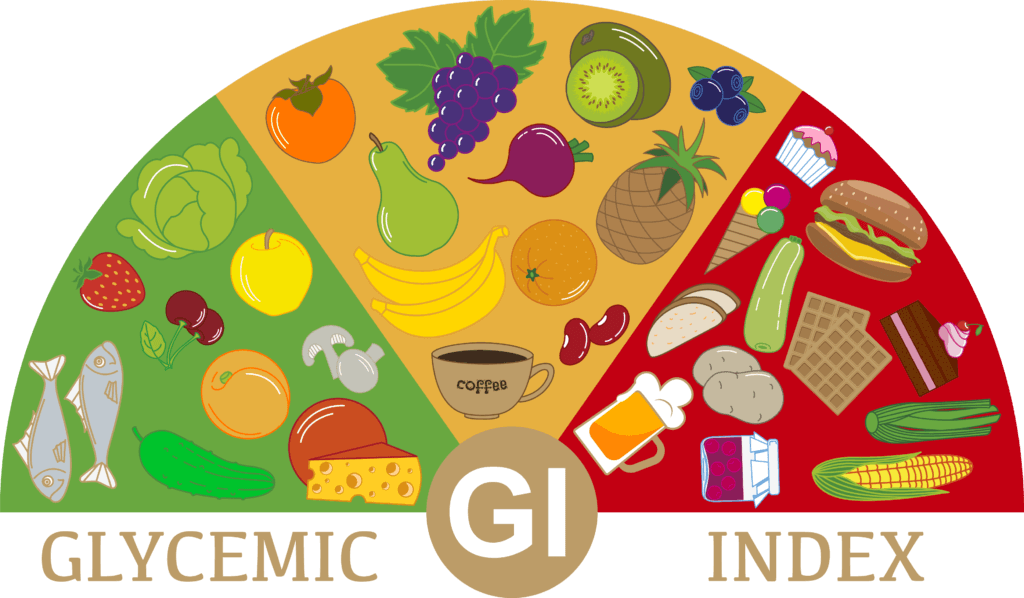

# **10. Conclusions**

* Nutrition therapy is on the cutting edge of diabetes prevention. It also plays a critical role in diabetes prevention.

* From the model output we weighted model advantages over time and we first decided to go with the SVM classifier model as it leverages the hyperplane margin call, useful for our current set of data given its linear separable characteristics. But after more tests and consultations, the hypertuned xgboost model became more favorable.


# **11. Recommendations**

* We recommend that those diagnosed with diabetes consider having a diet meal plan and the Eurisko model will help offer the appropriate food recommendation.

* The study recommends that individuals who are diabetic should take food with low glycemic index. The glycemic index (GI) is a measurement that ranks foods containing carbohydrates according to how much they affect someone’s blood sugar.

# **12. Follow up questions**

### a). Did we have the right data?
        Yes.

### b). Do we need other data to answer our question?

Yes. Preferably a dataset with a variety in food

### c). Did we have the right question?

Yes